In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('seaborn')

# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
#Without constant term
df_tennis = pd.read_csv('data/tennis.csv')
df1 = df_tennis[['surface', 'player1 total points won']].copy().dropna()
X = pd.get_dummies(df1['surface'], drop_first= True)
y = df1[['player1 total points won']]
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.864
Method:                       Least Squares   F-statistic:                              1638.
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                              22:01:13   Log-Likelihood:                         -5064.4
No. Observations:                      1027   AIC:                                  1.014e+04
Df Residuals:                          1023   BIC:                                  1.016e+04
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      2.412     31.961      0.000      72.350      81.815
Outdoor: Clay     88.0880      2.286     38.540      0.000      83.603      92.573
Outdoor: Grass    98.1667      2.924     33.575      0.000      92.429     103.904
Outdoor: Hard     87.6916      1.624     54.006      0.000      84.505      90.878
==============================================================================
Omnibus:                      214.435   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.809
Skew:                           1.212   Prob(JB):                     6.91e-92
Kurtosis:                       4.983   Cond. No.                         1.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
#With constant term
X =sm.add_constant(X)
y = df1[['player1 total points won']]
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     12.38
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):           7.81e-10
Time:                              22:01:13   Log-Likelihood:                -4849.5
No. Observations:                      1027   AIC:                             9709.
Df Residuals:                          1022   BIC:                             9734.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.611     23.049      0.000      76.142      90.314
Indoor: Hard      -6.1456      4.107     -1.496      0.135     -14.205       1.914
Outdoor: Clay      4.8599      4.059      1.197      0.232      -3.106      12.826
Outdoor: Grass    14.9386      4.321      3.457      0.001       6.460      23.417
Outdoor: Hard      4.4635      3.844      1.161      0.246      -3.079      12.006
==============================================================================
Omnibus:                      147.179   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.816
Skew:                           0.932   Prob(JB):                     1.88e-53
Kurtosis:                       4.484   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.2 Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

The regression should include a constant term in order to consider the variable (i.e. carpet surface) which was removed from the encoding process.By including a constant term, the coefficient can be explained relative to the number of points obtained on the carpet surface variable. The p-value increased for some variables which suggest that they possibly are not so much related to the number of points won by Federer.

In [4]:
#1.3
from scipy.stats import ttest_ind_from_stats
#variable 1 : carpet
#variable 2 : grass
ttest_ind_from_stats(mean1=83.2281, std1=3.611, nobs1=len(df1[df1['surface'] == 'Indoor: Carpet' ]), 
                     mean2=98.16669999999999, std2=4.321, nobs2=len(df1[df1['surface'] == 'Outdoor: Grass' ]))
#Given that pvalue is close to 0,the null hypothesis can be rejected. This indicates that the largest coefficient associated
#to the grass surface is statistically significantly different from the second largest related to the carpet surface.

Ttest_indResult(statistic=-22.87054630635666, pvalue=4.487327161452656e-56)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

Best model with linear regression is shown in figure 1. The model considers the following features : sex, age, pclass as a dummy variables. Other models that were created are shown in figure 2 and 3. Model in figure 2 considers most of the variables in the dataset excluding the variables such as 'alone', 'who', etc. which seemed derived from other columns. The model in figure 3 is similar but with less features than the model in figure 2. Essentially, the model 2 with all feature was considered. Then features which did not appear to be relatated to the dependent variable 'survived' based on the pvalue, F-statistics (i.e. for multiple features) and R-squared were removed. Basically, the removal process of the features which did not seem to be related to 'survived' had little impact on R-squared. The selected model includes the variable 'age' but the statistics suggest this feature has less of an impact on the variable 'survived' compared to 'sex' and 'pclass'. The accuracy of the linear regression model seems limited and the assumption on normality of residuals does not seem to be adequate. The use of linear regression model may not be the most appropriate given the variable 'survived' can take one of 2 values.  Overall accuracy could possibly be improved with a classification model (ex: logistic regression model). 

Figure 1 : Selected model
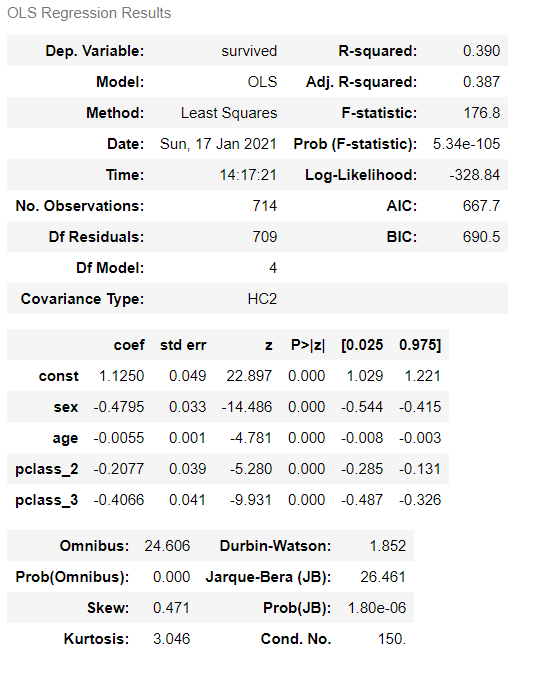

Figure 2: Other model 1
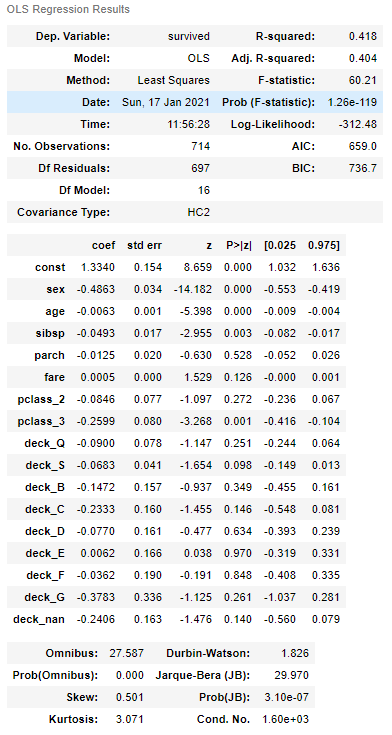

Figure 3: Other model 2
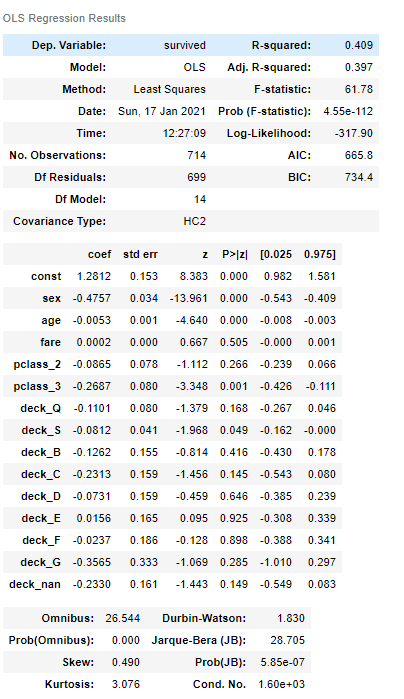




2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

The following figures can help interpret the coefficient. It seems that more females survived than males and older persons survived less than younger ones. The coefficient to the passenger class suggest that a greater number of passengers in the first class survived compared to the second class. It also indicates that a greater number of passengers in the second class survived compared to the third class. 
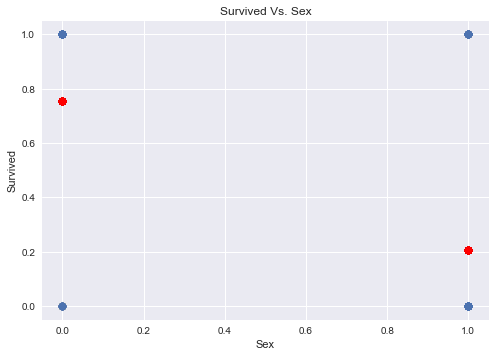
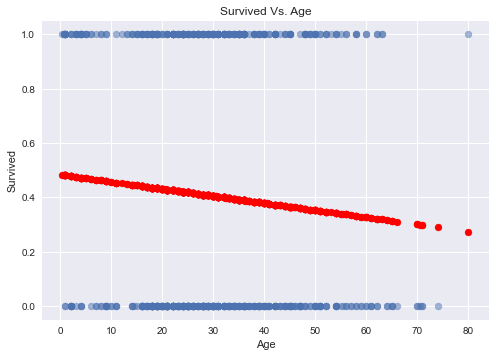

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

While the effect of regularization is clear by the comparison of the graphs shown below, it does not seem obvious to tell whether the accuracy is much improved for the selected dataset given that for the same age there are values for 1s and 0s for the dependent variable "survived". The errors for each data point graph may provide some insight on the accuracy of one model compared to another. Also, a classification model could potentially improve more the accuracy of the predictions. 
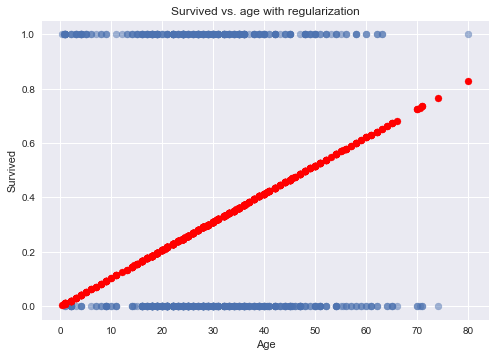
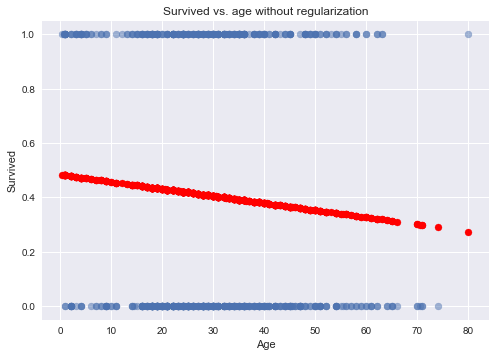


Extracted information from Kaggle (https://www.kaggle.com/c/titanic/data):



<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>



<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

In [5]:
def create_model(y, X, one_feature = False, feature = None, cov_type = False):
    '''
    y : Dataframe of the dependent variable
    X : Dataframe of independent variables (i.e. features)
    one_feature : If True, there is only one feature considered in the model. If False, there is more than one feature to
    consider in the model.
    feature : If one_feature is True then input the column name of the variable in the dataframe.
    cov_type : If true, cov_type = 'HC2' to account for heteroscedasticity.
    '''
    y = y.copy()
    X = X.copy()

    x_var_name = feature
    y_var_name = y.columns[0]
    
    if cov_type:
         est = sm.OLS(y, X).fit(cov_type='HC2')          
    else:
        est = sm.OLS(y, X).fit()   

    #Graph
    if one_feature == 1:
        xfit = np.array(X)
        yfit = est.predict(xfit[:, np.newaxis])
        fig, ax = plt.subplots()
        ax.scatter(X[x_var_name], y, alpha = 0.5)
        ax.scatter(X[x_var_name], yfit, color = 'red')
        plt.xlabel(x_var_name.title())
        plt.ylabel(y_var_name.title())
        plt.title(f'{y_var_name} vs. {x_var_name}'.title())
        plt.show()
    
    plt.hist(est.resid, bins=15)
    plt.show()    
    return est.summary()


In [6]:
df_titanic = sns.load_dataset('titanic')
variables = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']
df_titanic = df_titanic[variables].copy()



In [7]:
map_sex = {'male': 1, 'female': 0}
dummy_pclass = pd.get_dummies(df_titanic['pclass'], drop_first = True)
dummy_embarked = pd.get_dummies(df_titanic['embarked'], drop_first = True)
dummy_deck = pd.get_dummies(df_titanic['deck'], dummy_na=True, drop_first = True)
df_titanic['sex'] =  df_titanic['sex'].map(map_sex)
df2 = df_titanic.copy()
df2['fare'] = df2.fare.apply(lambda x : (np.log(x + 1)))
df2 = pd.merge(df_titanic, dummy_pclass, left_index = True, right_index = True)
df2 = pd.merge(df2, dummy_embarked, left_index = True, right_index = True)
df2 = pd.merge(df2, dummy_deck, left_index = True, right_index = True)
df2 = df2.drop(['pclass', 'embarked', 'deck'], axis =1)
df2 = df2.dropna(subset=['age'])
df2 = df2.rename(columns = {2: 'pclass_2', 
                      3: 'pclass_3',
                      'Q' : 'deck_Q',
                      'S' : 'deck_S',
                      'B' : 'deck_B',
                      'C' : 'deck_C',
                      'D' : 'deck_D',
                      'E' : 'deck_E',
                      'F' : 'deck_F',
                      'G' : 'deck_G',
                      df2.columns[-1]: 'deck_nan'
                     })


In [8]:
variables = ['survived', 
             'sex', 
             'age', 
             'sibsp', 
             'parch', 
             'fare', 
             'pclass_2',
             'pclass_3', 
             'deck_Q', 
             'deck_S', 
             'deck_B', 
             'deck_C', 
             'deck_D', 
             'deck_E',
             'deck_F', 
             'deck_G', 
             'deck_nan']



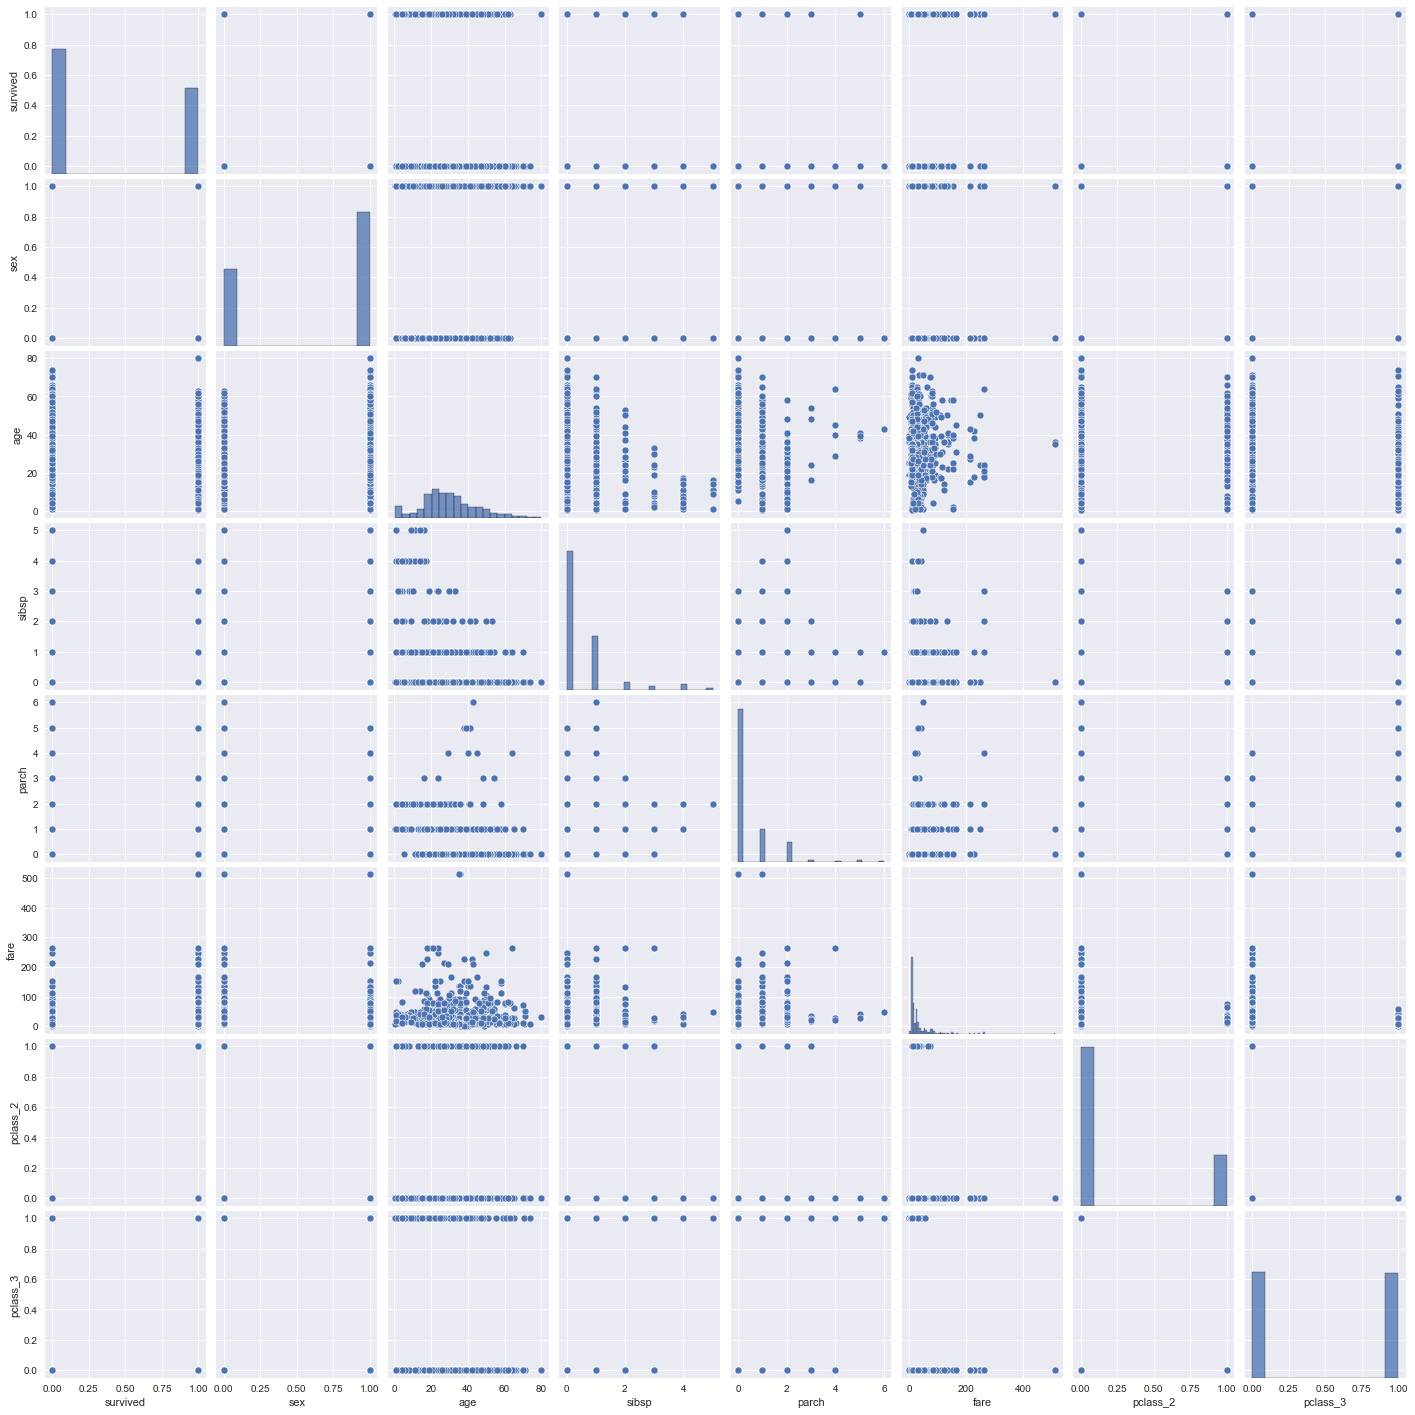

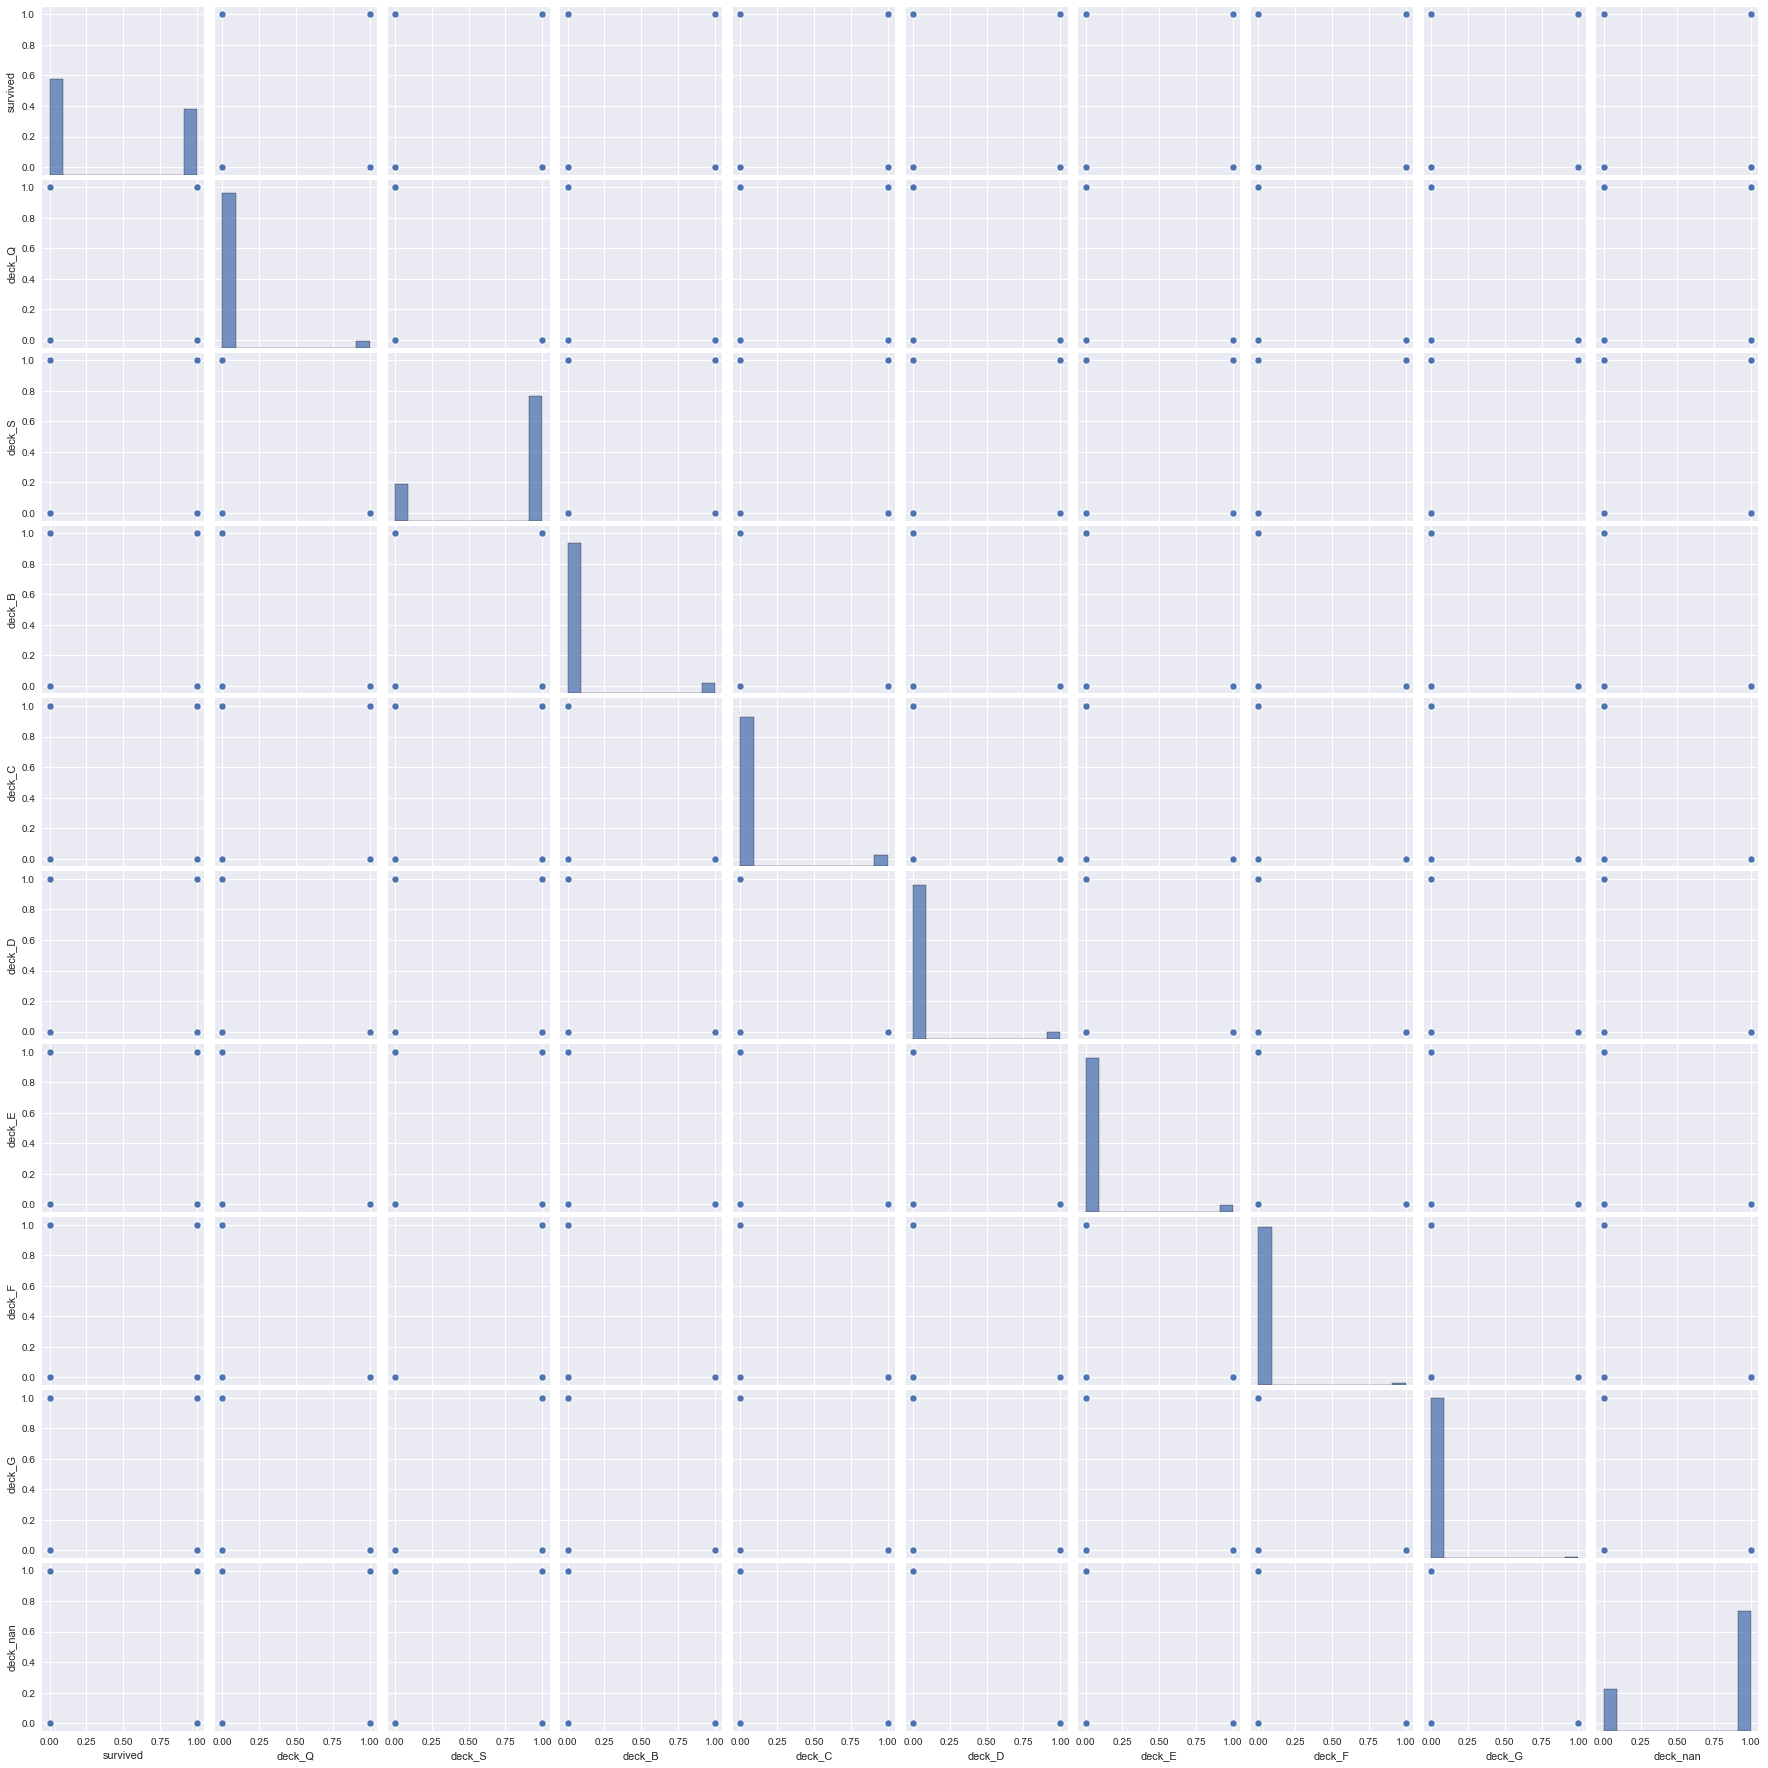

In [9]:
#Pairplot graph
df2_first_half = df2[variables[0:8]]
variables_last_half = ['survived', 'deck_Q', 'deck_S','deck_B', 'deck_C', 'deck_D', 'deck_E','deck_F', 'deck_G', 'deck_nan']
df2_last_half = df2[variables_last_half]
df2_last_half 
sns.pairplot(df2_first_half)
sns.pairplot(df2_last_half)
plt.show()

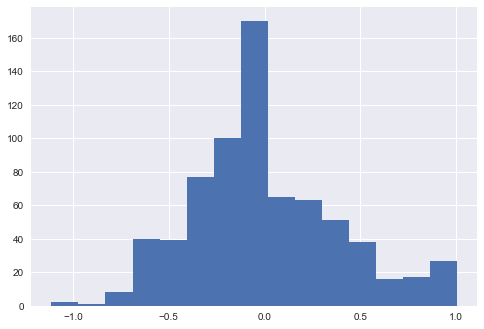

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     176.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.34e-105
Time:                        22:02:36   Log-Likelihood:                -328.84
No. Observations:                 714   AIC:                             667.7
Df Residuals:                     709   BIC:                             690.5
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1250      0.049     22.897      0.000       1.029       1.221
sex           -0.4795      0.033    -14.486      0.000      -0.544      -0.415
age           -0.0055      0.001     -4.781      0.000      -0.008      -0.003
pclass_2      -0.2077      0.039     -5.280      0.000      -0.285      -0.131
pclass_3      -0.4066      0.041     -9.931      0.000      -0.487      -0.326
==============================================================================
Omnibus:                       24.606   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.461
Skew:                           0.471   Prob(JB):                     1.80e-06
Kurtosis:                       3.046   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [10]:
# Answer to question 2.1
# Best model with linear regression : Linear regression with following variables : 'sex', 'age', 'pclass_2', 'pclass_3'
variables = ['sex',
             'age', 
             'pclass_2',
             'pclass_3']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)

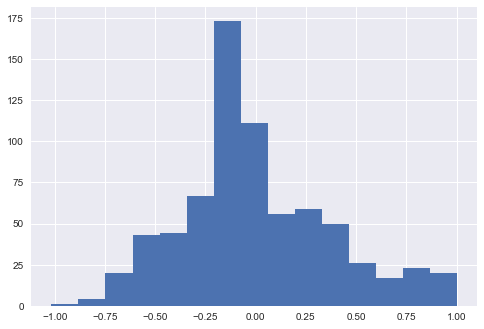

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     60.21
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.26e-119
Time:                        22:02:37   Log-Likelihood:                -312.48
No. Observations:                 714   AIC:                             659.0
Df Residuals:                     697   BIC:                             736.7
Df Model:                          16                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3340      0.154      8.659      0.000       1.032       1.636
sex           -0.4863      0.034    -14.182      0.000      -0.553      -0.419
age           -0.0063      0.001     -5.398      0.000      -0.009      -0.004
sibsp         -0.0493      0.017     -2.955      0.003      -0.082      -0.017
parch         -0.0125      0.020     -0.630      0.528      -0.052       0.026
fare           0.0005      0.000      1.529      0.126      -0.000       0.001
pclass_2      -0.0846      0.077     -1.097      0.272      -0.236       0.067
pclass_3      -0.2599      0.080     -3.268      0.001      -0.416      -0.104
deck_Q        -0.0900      0.078     -1.147      0.251      -0.244       0.064
deck_S        -0.0683      0.041     -1.654      0.098      -0.149       0.013
deck_B        -0.1472      0.157     -0.937      0.349      -0.455       0.161
deck_C        -0.2333      0.160     -1.455      0.146      -0.548       0.081
deck_D        -0.0770      0.161     -0.477      0.634      -0.393       0.239
deck_E         0.0062      0.166      0.038      0.970      -0.319       0.331
deck_F        -0.0362      0.190     -0.191      0.848      -0.408       0.335
deck_G        -0.3783      0.336     -1.125      0.261      -1.037       0.281
deck_nan      -0.2406      0.163     -1.476      0.140      -0.560       0.079
==============================================================================
Omnibus:                       27.587   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.970
Skew:                           0.501   Prob(JB):                     3.10e-07
Kurtosis:                       3.071   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Linear regression with all variables
variables = ['sex', 
             'age', 
             'sibsp', 
             'parch', 
             'fare', 
             'pclass_2',
             'pclass_3', 
             'deck_Q', 
             'deck_S', 
             'deck_B', 
             'deck_C', 
             'deck_D', 
             'deck_E',
             'deck_F', 
             'deck_G', 
             'deck_nan']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)

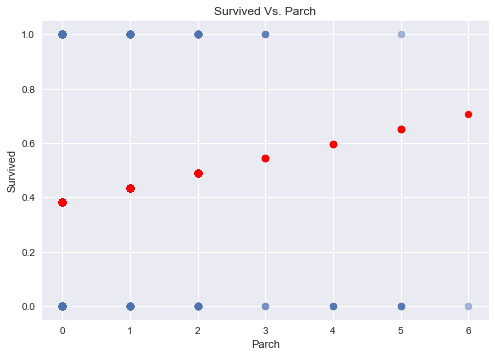

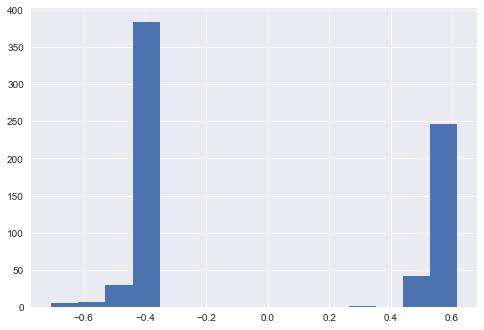

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.962
Date:                Fri, 22 Jan 2021   Prob (F-statistic):             0.0262
Time:                        22:02:39   Log-Likelihood:                -502.29
No. Observations:                 714   AIC:                             1009.
Df Residuals:                     712   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3830      0.020     18.746      0.000       0.343       0.423
parch          0.0537      0.024      2.227      0.026       0.006       0.101
==============================================================================
Omnibus:                     3205.374   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.999
Skew:                           0.373   Prob(JB):                     1.07e-25
Kurtosis:                       1.181   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [12]:
# Linear regression with following variables : constant term, parch
variables = ['parch']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = True, feature = 'parch', cov_type = True)

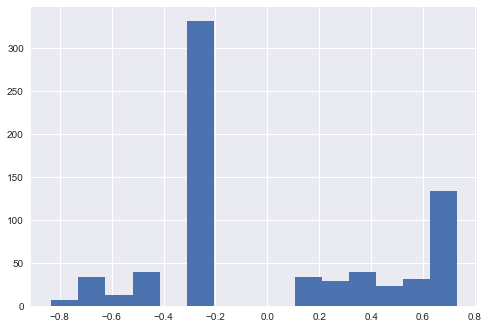

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     12.75
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           6.39e-19
Time:                        22:02:41   Log-Likelihood:                -456.66
No. Observations:                 714   AIC:                             933.3
Df Residuals:                     704   BIC:                             979.0
Df Model:                           9                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6480      0.153      4.245      0.000       0.349       0.947
deck_Q        -0.1800      0.098     -1.829      0.067      -0.373       0.013
deck_S        -0.1552      0.049     -3.165      0.002      -0.251      -0.059
deck_B         0.1834      0.165      1.113      0.266      -0.139       0.506
deck_C         0.0386      0.167      0.231      0.817      -0.289       0.366
deck_D         0.1841      0.170      1.081      0.280      -0.150       0.518
deck_E         0.2147      0.172      1.251      0.211      -0.122       0.551
deck_F         0.1436      0.216      0.663      0.507      -0.281       0.568
deck_G         0.0072      0.327      0.022      0.982      -0.634       0.648
deck_nan      -0.1993      0.154     -1.290      0.197      -0.502       0.103
==============================================================================
Omnibus:                     1111.534   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.270
Skew:                           0.422   Prob(JB):                     5.51e-16
Kurtosis:                       1.715   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [13]:
# Linear regression with following variables : constant term, deck as dummy variables
variables = ['deck_Q', 'deck_S', 'deck_B', 'deck_C', 'deck_D', 'deck_E','deck_F', 'deck_G', 'deck_nan']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)


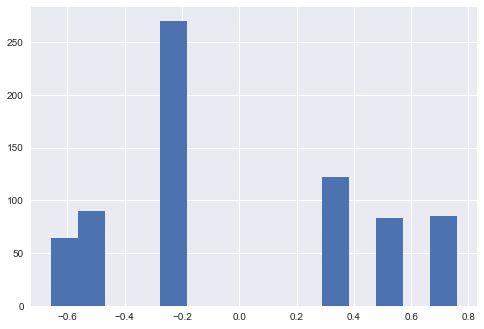

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     53.77
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.80e-22
Time:                        22:02:41   Log-Likelihood:                -455.65
No. Observations:                 714   AIC:                             917.3
Df Residuals:                     711   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6559      0.035     18.779      0.000       0.587       0.724
pclass_2      -0.1761      0.052     -3.408      0.001      -0.277      -0.075
pclass_3      -0.4165      0.042    -10.000      0.000      -0.498      -0.335
==============================================================================
Omnibus:                     1179.237   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.161
Skew:                           0.326   Prob(JB):                     3.18e-14
Kurtosis:                       1.710   Cond. No.                         4.31
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [14]:
# Linear regression with following variables : constant term, pclass as dummy variables
# The predicted values are not in agreement with the data. 
variables = ['pclass_2', 'pclass_3']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)


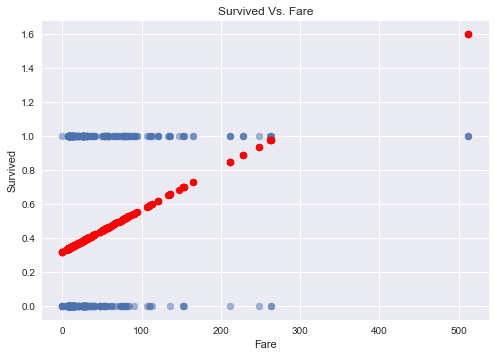

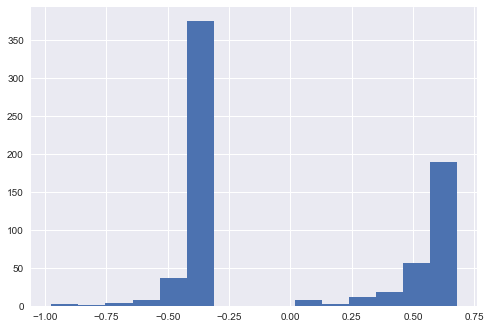

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     42.39
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.41e-10
Time:                        22:02:43   Log-Likelihood:                -478.77
No. Observations:                 714   AIC:                             961.5
Df Residuals:                     712   BIC:                             970.7
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.022     14.831      0.000       0.277       0.362
fare           0.0025      0.000      6.511      0.000       0.002       0.003
==============================================================================
Omnibus:                     3976.119   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.844
Skew:                           0.409   Prob(JB):                     2.09e-22
Kurtosis:                       1.361   Cond. No.                         75.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [15]:
# Linear regression with following variables : constant term, fare
variables = ['fare']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = True, feature = 'fare', cov_type = True)

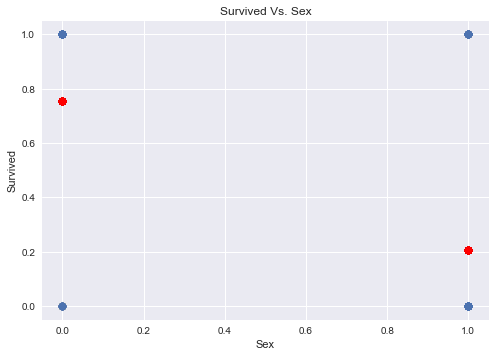

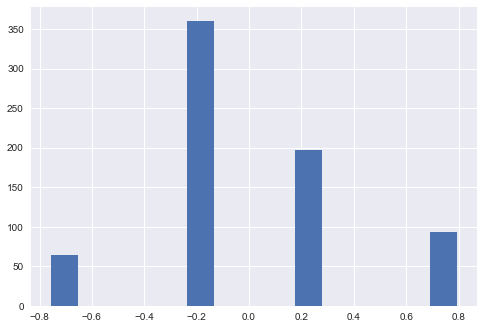

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     281.4
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.77e-53
Time:                        22:02:45   Log-Likelihood:                -382.98
No. Observations:                 714   AIC:                             770.0
Df Residuals:                     712   BIC:                             779.1
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7548      0.027     28.290      0.000       0.702       0.807
sex           -0.5495      0.033    -16.776      0.000      -0.614      -0.485
==============================================================================
Omnibus:                       16.788   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.558
Skew:                           0.375   Prob(JB):                     0.000154
Kurtosis:                       2.831   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [16]:
# Linear regression with following variables : constant term, sex
variables = ['sex']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = True, feature = 'sex', cov_type = True)

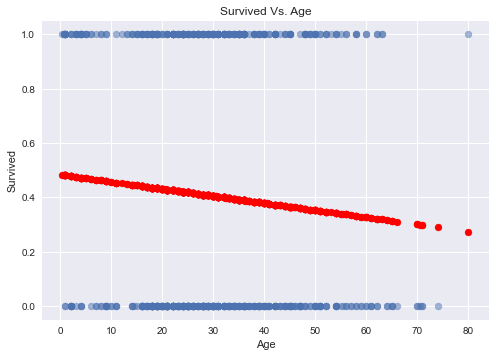

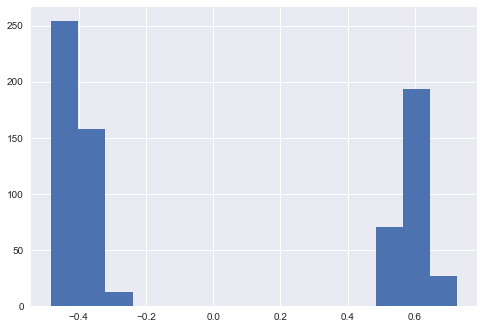

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.332
Date:                Fri, 22 Jan 2021   Prob (F-statistic):             0.0377
Time:                        22:02:46   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4838      0.042     11.558      0.000       0.402       0.566
age           -0.0026      0.001     -2.081      0.037      -0.005      -0.000
==============================================================================
Omnibus:                     3171.380   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [17]:
# Linear regression with following variables : constant term, age
variables = ['age']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = True, feature = 'age', cov_type = True)

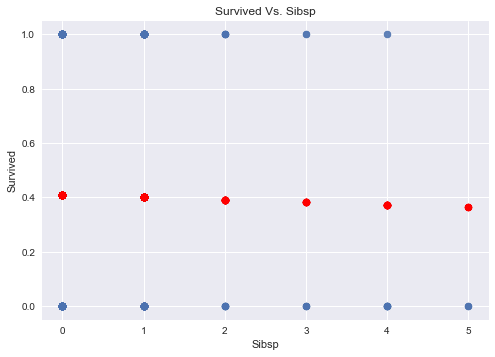

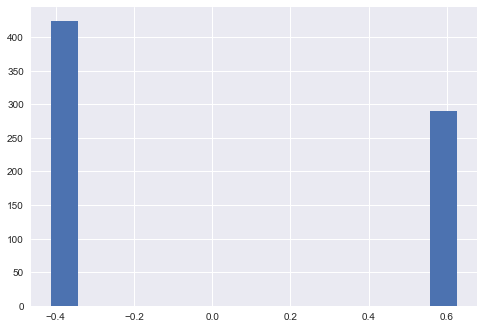

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2539
Date:                Fri, 22 Jan 2021   Prob (F-statistic):              0.615
Time:                        22:02:47   Log-Likelihood:                -505.31
No. Observations:                 714   AIC:                             1015.
Df Residuals:                     712   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4109      0.021     19.790      0.000       0.370       0.452
sibsp         -0.0092      0.018     -0.504      0.614      -0.045       0.027
==============================================================================
Omnibus:                     3114.435   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.498
Skew:                           0.382   Prob(JB):                     1.13e-26
Kurtosis:                       1.147   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [18]:
# Linear regression with following variables : constant term, sibsp
variables = ['sibsp']
X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = True, feature = 'sibsp', cov_type = True)

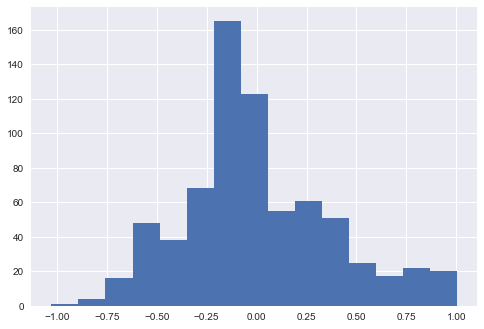

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     63.32
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.46e-119
Time:                        22:02:48   Log-Likelihood:                -312.70
No. Observations:                 714   AIC:                             657.4
Df Residuals:                     698   BIC:                             730.5
Df Model:                          15                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3296      0.154      8.647      0.000       1.028       1.631
sex           -0.4821      0.034    -14.384      0.000      -0.548      -0.416
age           -0.0063      0.001     -5.371      0.000      -0.009      -0.004
fare           0.0004      0.000      1.372      0.170      -0.000       0.001
sibsp         -0.0529      0.016     -3.411      0.001      -0.083      -0.023
pclass_2      -0.0887      0.077     -1.154      0.249      -0.239       0.062
pclass_3      -0.2650      0.079     -3.346      0.001      -0.420      -0.110
deck_Q        -0.0893      0.079     -1.133      0.257      -0.244       0.065
deck_S        -0.0696      0.041     -1.688      0.091      -0.150       0.011
deck_B        -0.1461      0.157     -0.932      0.351      -0.453       0.161
deck_C        -0.2310      0.160     -1.443      0.149      -0.545       0.083
deck_D        -0.0743      0.161     -0.461      0.645      -0.390       0.242
deck_E         0.0086      0.166      0.052      0.959      -0.316       0.333
deck_F        -0.0335      0.189     -0.177      0.859      -0.405       0.338
deck_G        -0.3812      0.334     -1.140      0.254      -1.037       0.274
deck_nan      -0.2368      0.163     -1.456      0.145      -0.556       0.082
==============================================================================
Omnibus:                       27.041   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.308
Skew:                           0.495   Prob(JB):                     4.32e-07
Kurtosis:                       3.073   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Linear regression with all variables but 'parch'
variables = ['sex',
             'age', 
             'fare',
             'sibsp',
             'pclass_2',
             'pclass_3', 
             'deck_Q', 
             'deck_S', 
             'deck_B', 
             'deck_C', 
             'deck_D', 
             'deck_E',
             'deck_F', 
             'deck_G', 
             'deck_nan']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)

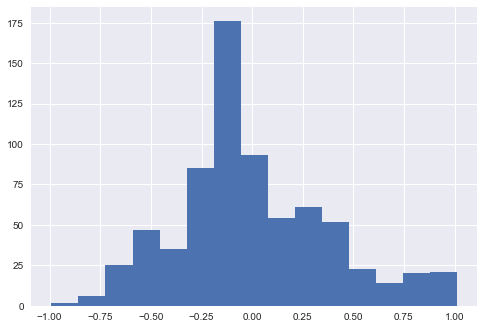

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     61.78
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          4.55e-112
Time:                        22:02:48   Log-Likelihood:                -317.90
No. Observations:                 714   AIC:                             665.8
Df Residuals:                     699   BIC:                             734.4
Df Model:                          14                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2812      0.153      8.383      0.000       0.982       1.581
sex           -0.4757      0.034    -13.961      0.000      -0.543      -0.409
age           -0.0053      0.001     -4.640      0.000      -0.008      -0.003
fare           0.0002      0.000      0.667      0.505      -0.000       0.001
pclass_2      -0.0865      0.078     -1.112      0.266      -0.239       0.066
pclass_3      -0.2687      0.080     -3.348      0.001      -0.426      -0.111
deck_Q        -0.1101      0.080     -1.379      0.168      -0.267       0.046
deck_S        -0.0812      0.041     -1.968      0.049      -0.162      -0.000
deck_B        -0.1262      0.155     -0.814      0.416      -0.430       0.178
deck_C        -0.2313      0.159     -1.456      0.145      -0.543       0.080
deck_D        -0.0731      0.159     -0.459      0.646      -0.385       0.239
deck_E         0.0156      0.165      0.095      0.925      -0.308       0.339
deck_F        -0.0237      0.186     -0.128      0.898      -0.388       0.341
deck_G        -0.3565      0.333     -1.069      0.285      -1.010       0.297
deck_nan      -0.2330      0.161     -1.443      0.149      -0.549       0.083
==============================================================================
Omnibus:                       26.544   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.705
Skew:                           0.490   Prob(JB):                     5.85e-07
Kurtosis:                       3.076   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Linear regression with all variables excluding 'parch', 'sibsp'
variables = ['sex',
             'age', 
             'fare', 
             'pclass_2',
             'pclass_3', 
             'deck_Q', 
             'deck_S', 
             'deck_B', 
             'deck_C', 
             'deck_D', 
             'deck_E',
             'deck_F', 
             'deck_G', 
             'deck_nan']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)

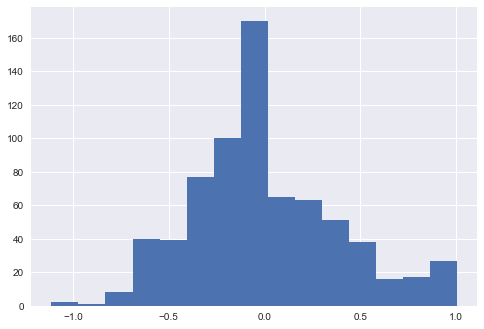

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     176.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.34e-105
Time:                        22:02:49   Log-Likelihood:                -328.84
No. Observations:                 714   AIC:                             667.7
Df Residuals:                     709   BIC:                             690.5
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1250      0.049     22.897      0.000       1.029       1.221
sex           -0.4795      0.033    -14.486      0.000      -0.544      -0.415
age           -0.0055      0.001     -4.781      0.000      -0.008      -0.003
pclass_2      -0.2077      0.039     -5.280      0.000      -0.285      -0.131
pclass_3      -0.4066      0.041     -9.931      0.000      -0.487      -0.326
==============================================================================
Omnibus:                       24.606   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.461
Skew:                           0.471   Prob(JB):                     1.80e-06
Kurtosis:                       3.046   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [21]:
# Linear regression with all variables excluding 'parch', 'sibsp','fare', deck dummy variables
variables = ['sex',
             'age', 
             'pclass_2',
             'pclass_3']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

create_model(y, X, one_feature = False, feature = None, cov_type = True)

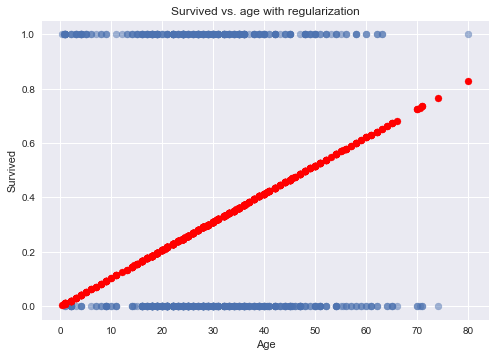

In [22]:
# Linear regression with regularization
variables = ['age']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

est = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.2, L1_wt=1.0)
xfit = np.array(X)
yfit = est.predict(xfit[:, np.newaxis])
fig, ax = plt.subplots()
ax.scatter(X['age'], y, alpha = 0.5)
ax.scatter(X['age'], yfit, color = 'red')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survived vs. age with regularization')
plt.show()


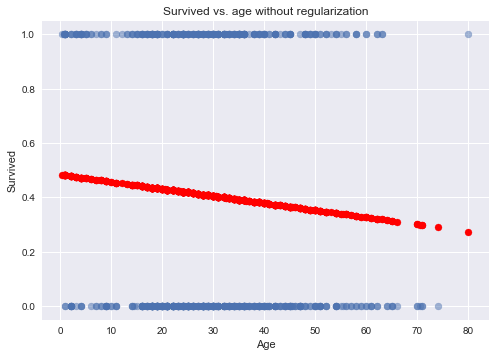

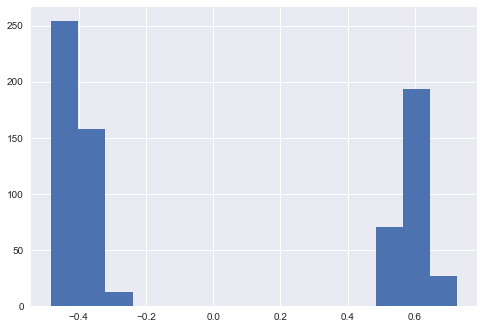

In [23]:
# Linear regression without regularization
variables = ['age']

X = df2[variables]
X = sm.add_constant(X)
y = df2[['survived']]

est = sm.OLS(y, X).fit()
xfit = np.array(X)
yfit = est.predict(xfit[:, np.newaxis])
fig, ax = plt.subplots()
ax.scatter(X['age'], y, alpha = 0.5)
ax.scatter(X['age'], yfit, color = 'red')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survived vs. age without regularization')
plt.show()

plt.hist(est.resid, bins=15)
plt.show()  

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

# ANSWER: (SELECTED MODEL)

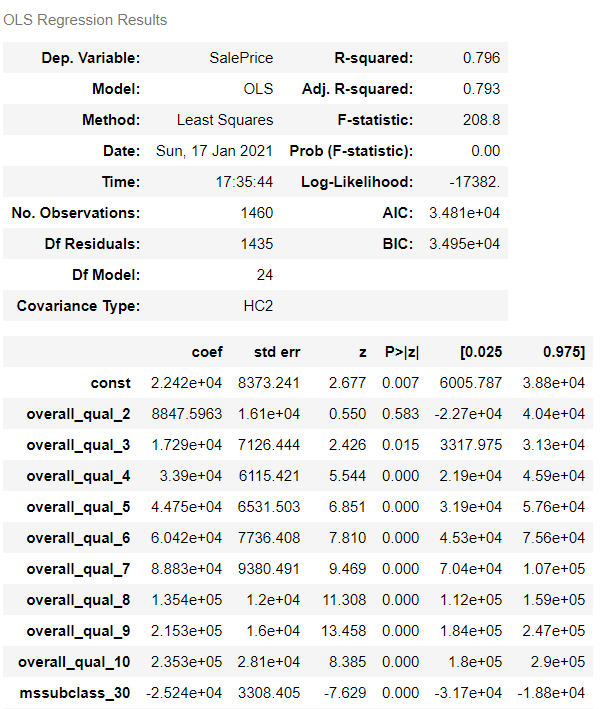
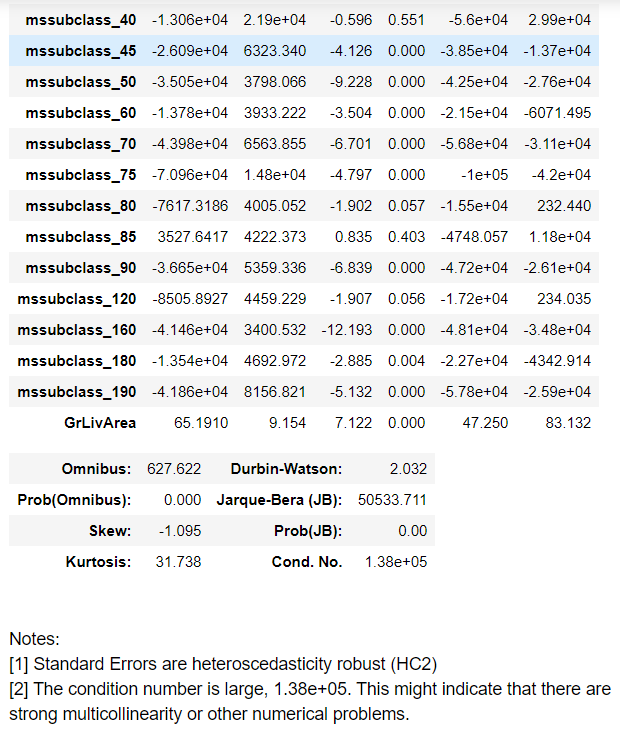



Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [24]:
def create_features_dataframe(target_var, features, data, add_constant_term = True):
    '''
    Input:
    target_value : Dependent variable to predict
    features : Independent variable(s) selected for model as a list
    data : Original dataframe to modify in order to create dataframe of selected features
    add_constant_term : Adds a constant term to dataframe with selected features
    '''
    df = data.copy()
    f = features.copy()
    temp = f.copy()
    temp.append(target_var)
    df = df[temp]
    df = df.dropna()
    X = df[f]
    if add_constant_term:
        X = sm.add_constant(X)
        
    y = df[[target_var]]
    return y, X
    

In [25]:
#load data set
df_house = pd.read_csv('data/house_price.csv')


In [26]:
#Remove features which does not contain a lot of data
variables_to_rm = ['Alley',
                   'PoolQC', 
                   'Fence',
                   'FireplaceQu',
                   'MiscFeature']

df3 = df_house.drop(variables_to_rm, axis = 1)


In [27]:
# Distinguish data set based on data type (numbers vs. objects)
df3_num = df3.select_dtypes(include=['int64', 'float64'])
df3_obj = df3.select_dtypes(include=['O'])


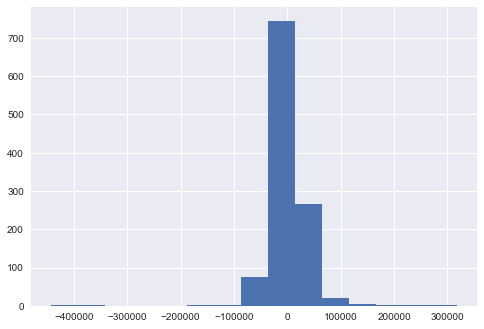

C:\Users\education\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 37, but rank is 35
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     112.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:02:51   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:                  HC2                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05   1.57e+06     -0.213      0.832   -3.42e+06    2.75e+06
Id               -1.2053      2.746     -0.439      0.661      -6.588       4.177
MSSubClass     -200.0623     72.379     -2.764      0.006    -341.923     -58.202
LotFrontage    -116.0282    153.251     -0.757      0.449    -416.395     184.339
LotArea           0.5422      0.205      2.643      0.008       0.140       0.944
OverallQual    1.866e+04   2667.808      6.993      0.000    1.34e+04    2.39e+04
OverallCond    5239.4864   1230.872      4.257      0.000    2827.021    7651.952
YearBuilt       316.4201     71.167      4.446      0.000     176.936     455.904
YearRemodAdd    119.4141     89.359      1.336      0.181     -55.726     294.554
MasVnrArea       31.4076     12.367      2.540      0.011       7.169      55.646
BsmtFinSF1        9.6803     10.977      0.882      0.378     -11.835      31.195
BsmtFinSF2        0.6662      4.539      0.147      0.883      -8.229       9.562
BsmtUnfSF        -2.6710      3.189     -0.838      0.402      -8.921       3.579
TotalBsmtSF       7.6755     12.253      0.626      0.531     -16.340      31.692
1stFlrSF         14.4718     11.691      1.238      0.216      -8.442      37.386
2ndFlrSF         15.1237     13.759      1.099      0.272     -11.843      42.090
LowQualFinSF      1.9062     26.413      0.072      0.942     -49.863      53.676
GrLivArea        31.5017     11.443      2.753      0.006       9.074      53.929
BsmtFullBath   9042.8022   7334.334      1.233      0.218   -5332.228    2.34e+04
BsmtHalfBath   2465.0370   7347.372      0.335      0.737   -1.19e+04    1.69e+04
FullBath       5433.1446   5002.559      1.086      0.277   -4371.691    1.52e+04
HalfBath      -1098.3395   3417.867     -0.321      0.748   -7797.237    5600.558
BedroomAbvGr  -1.022e+04   3036.700     -3.365      0.001   -1.62e+04   -4267.087
KitchenAbvGr  -2.202e+04   5767.892     -3.818      0.000   -3.33e+04   -1.07e+04
TotRmsAbvGrd   5464.1204   2760.997      1.979      0.048      52.666    1.09e+04
Fireplaces     4371.8698   2952.415      1.481      0.139   -1414.757    1.02e+04
GarageYrBlt     -47.2763     93.526     -0.505      0.613    -230.584     136.032
GarageCars     1.685e+04   8170.558      2.062      0.039     835.719    3.29e+04
GarageArea        6.2744     20.500      0.306      0.760     -33.904      46.453
WoodDeckSF       21.4407     11.537      1.858      0.063      -1.171      44.053
OpenPorchSF      -2.2524     28.383     -0.079      0.937     -57.883      53.378
EnclosedPorch     7.2949     20.516      0.356      0.722     -32.916      47.506
3SsnPorch        33.4852     41.729      0.802      0.422     -48.302     115.272
ScreenPorch      58.0465     29.335      1.979      0.048       0.550     115.543
PoolArea        -60.5171    145.711     -0.415   

In [28]:
#All features with numerical values
data = df3_num
target_var = 'SalePrice'
features = list(df3_num.drop('SalePrice', axis = 1).columns)
y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)


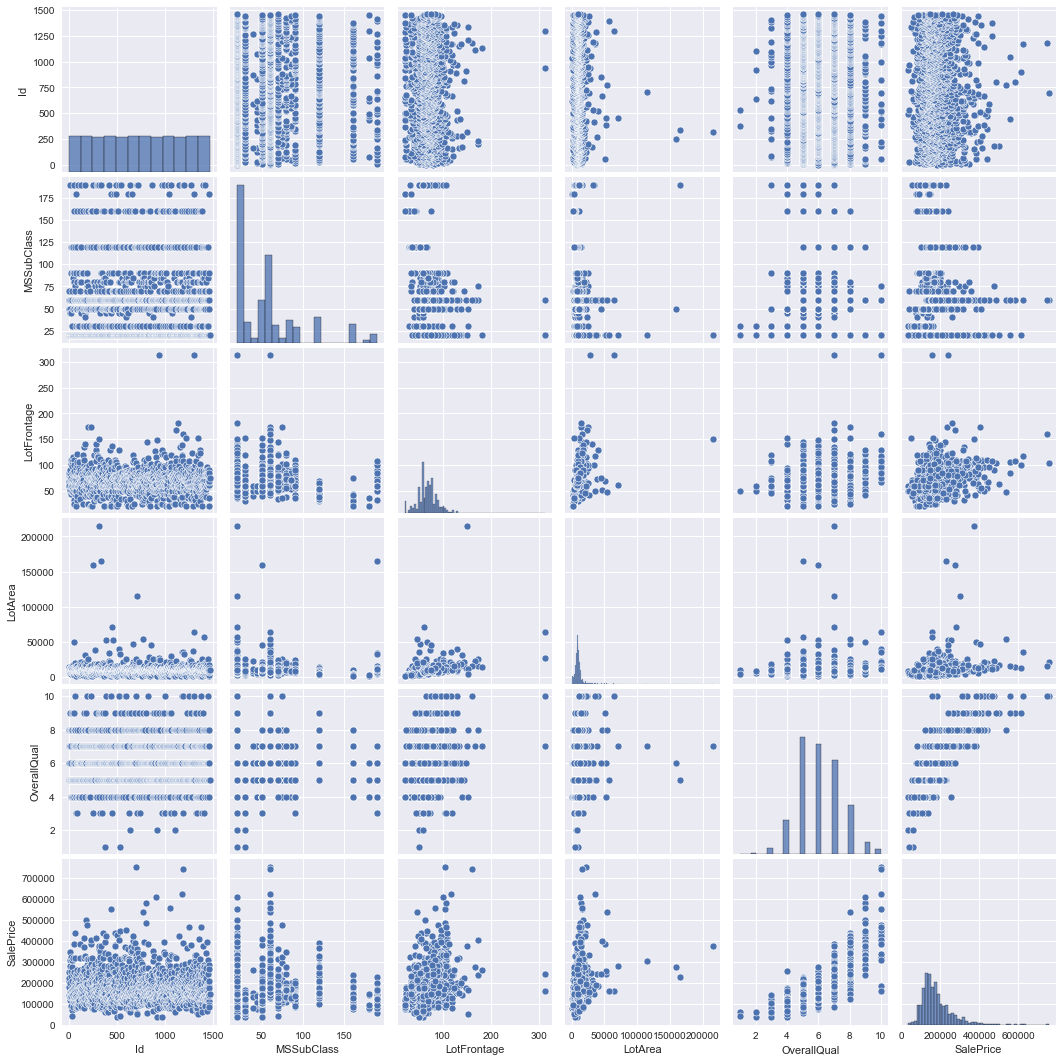

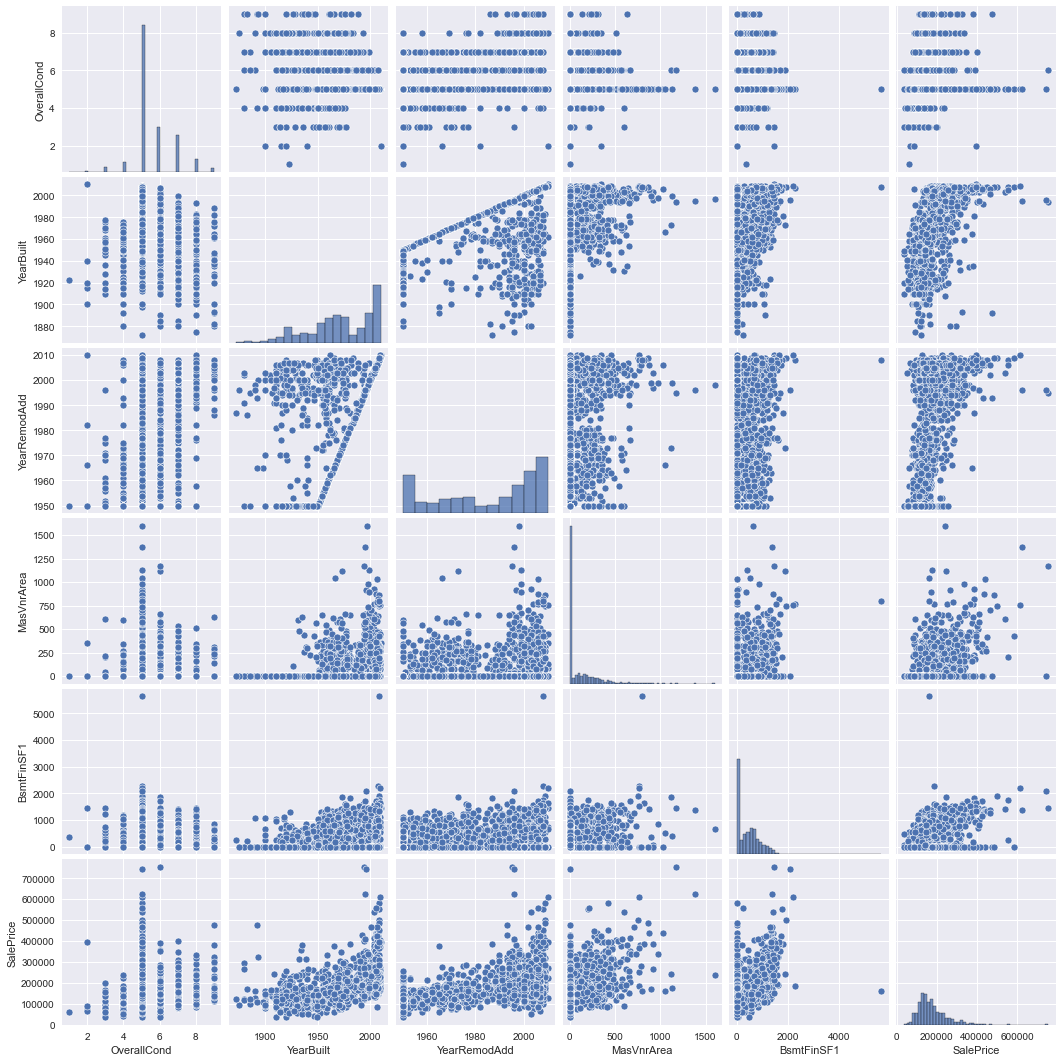

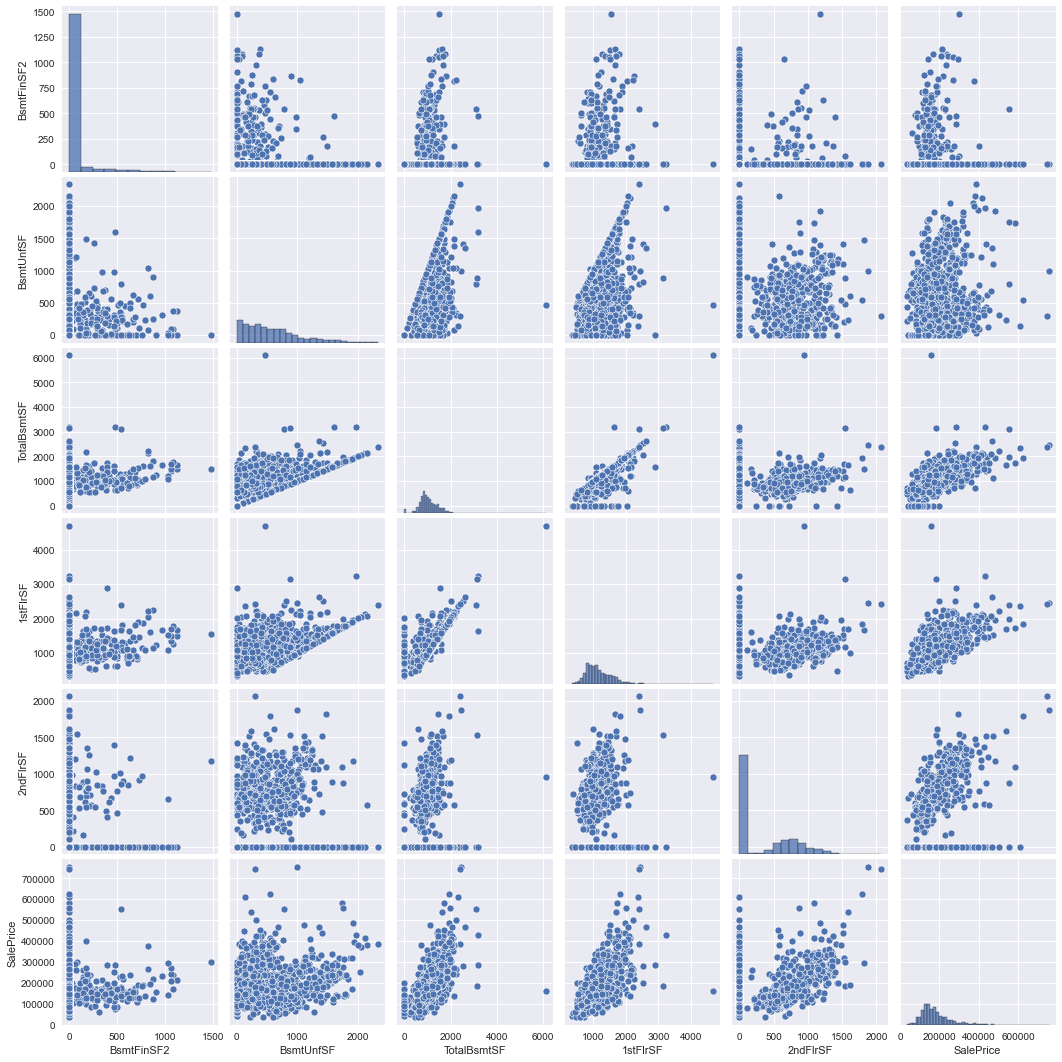

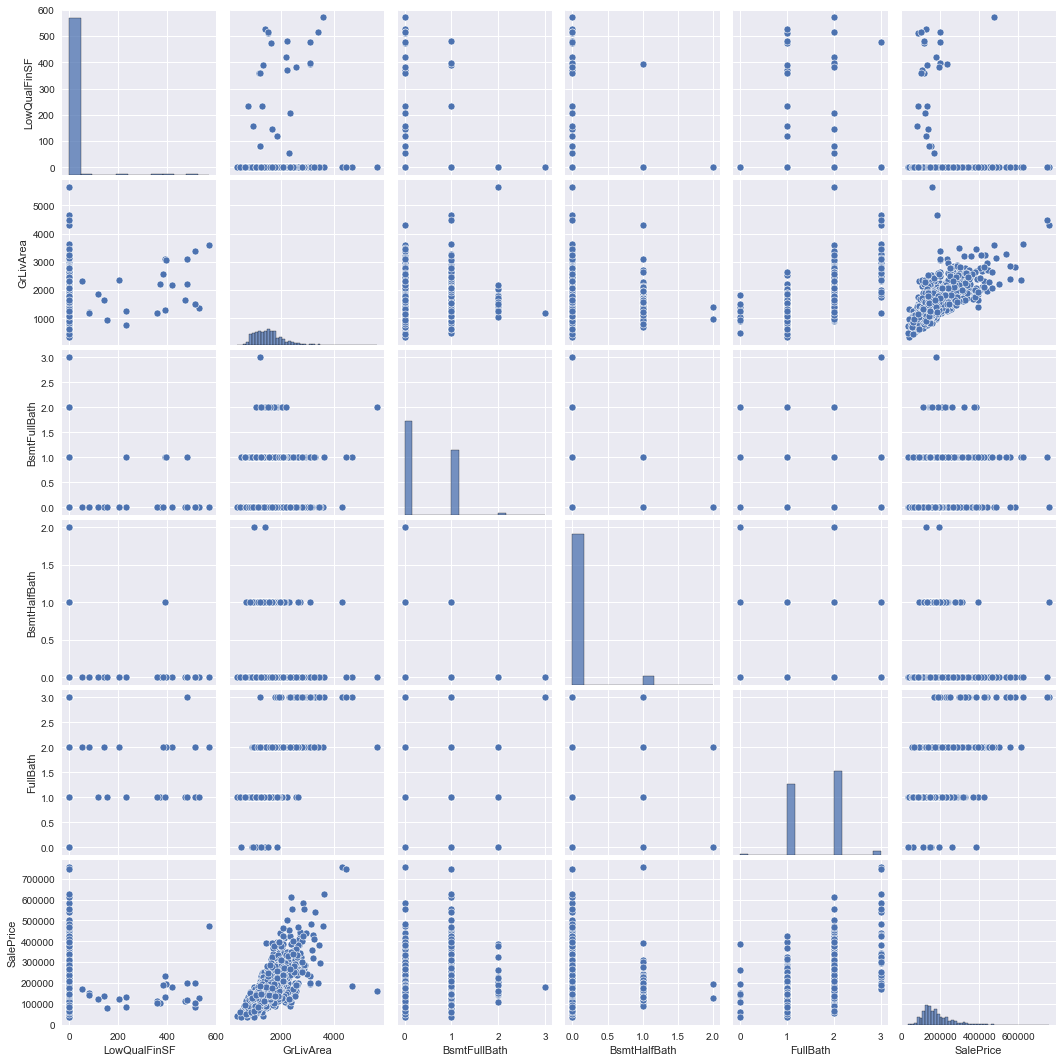

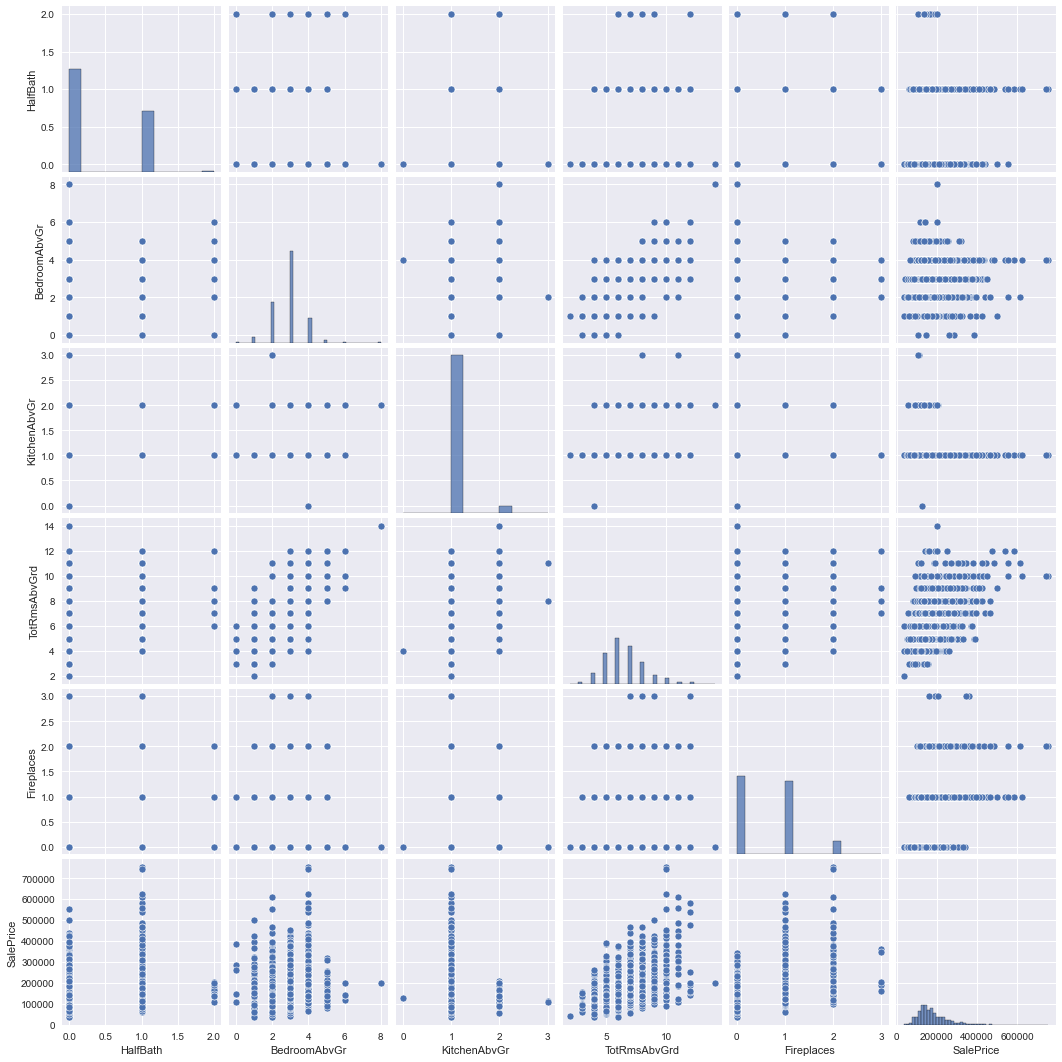

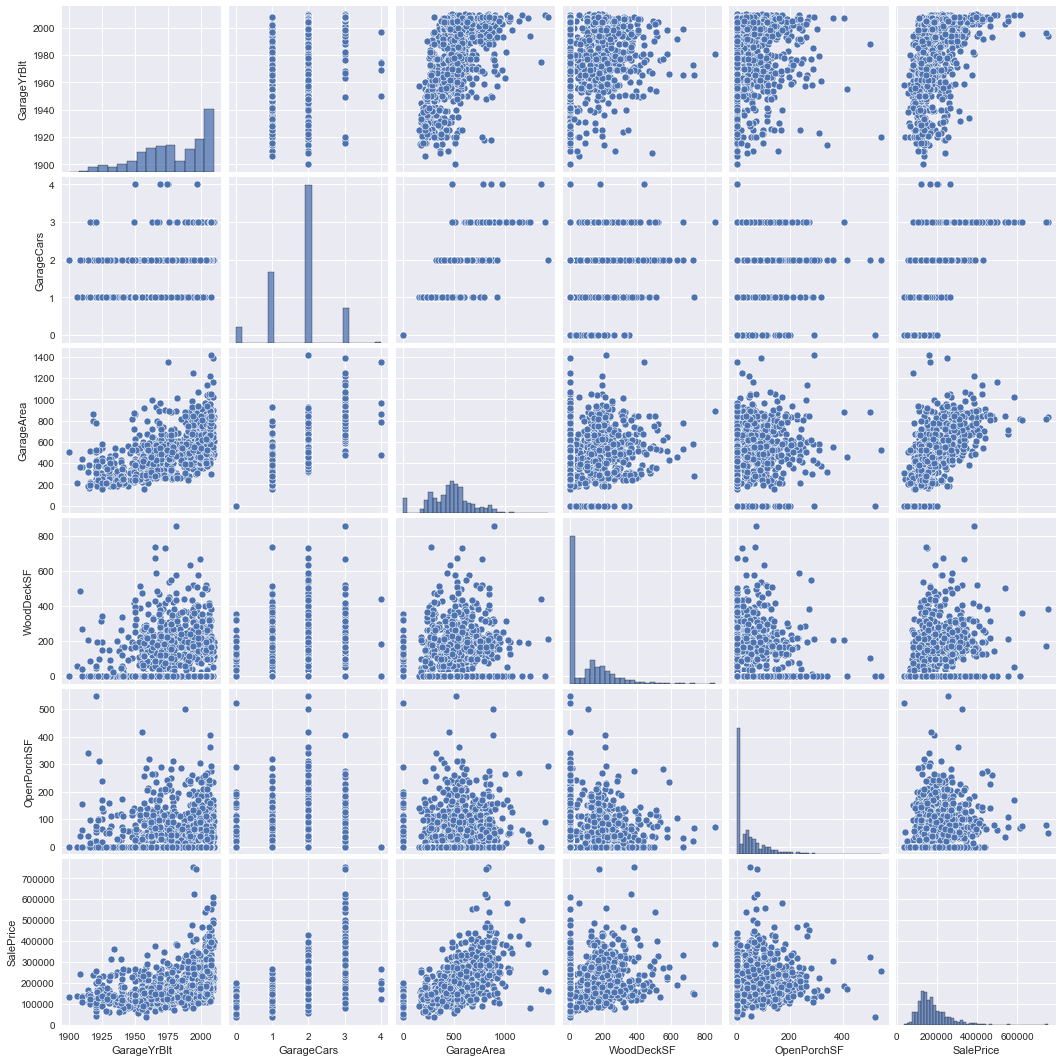

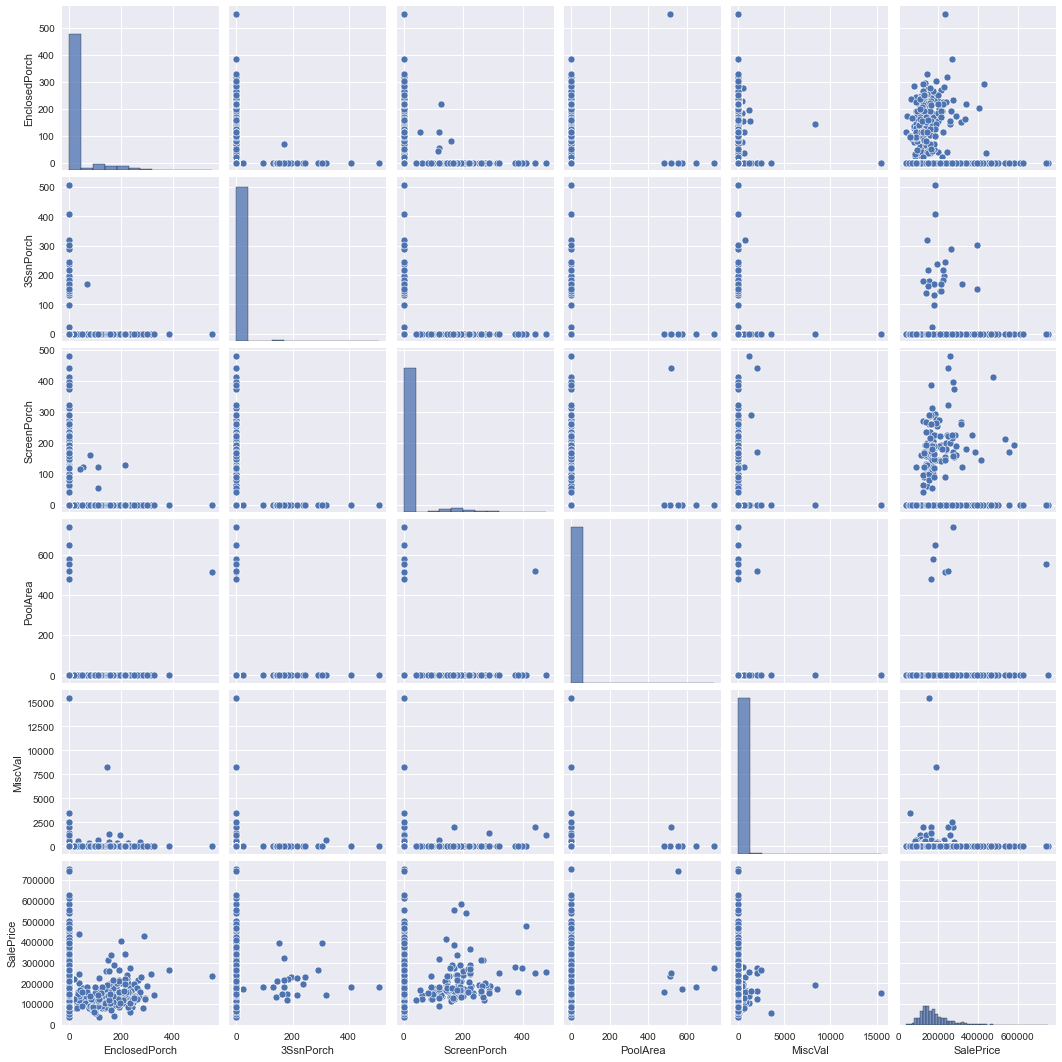

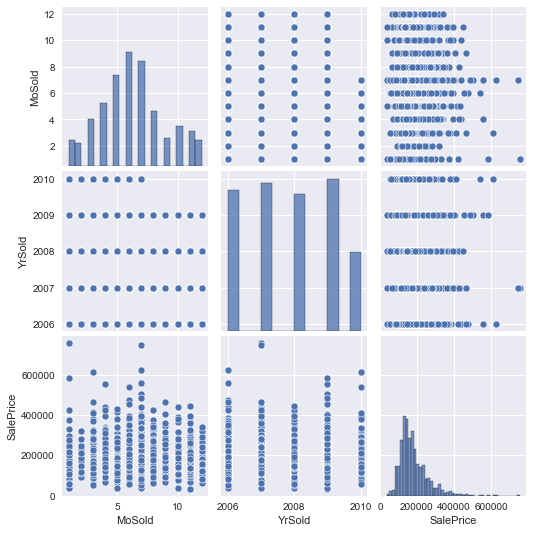

None


In [29]:
def create_multi_pairplot(target_var, data, num_split):
    df = data.copy()
    df_target = df[[target_var]]
    df = df.drop(target_var, axis = 1)
    cols = df.columns
    num_cols = len(cols)
    num_f_by_pairplot = int(len(cols)/num_split)
    for i in range (num_split+1):
        start = i*num_f_by_pairplot
        if i == num_split:
            end = num_cols+1
        else:
            end = i*num_f_by_pairplot+num_f_by_pairplot
            
        temp = df.iloc[:, start:end] 
        temp = pd.merge(temp, df_target, left_index = True, right_index = True)
        sns.pairplot(temp)
        plt.show()

target_var = 'SalePrice'
data = df3_num
num_split = 7

print(create_multi_pairplot(target_var = target_var, data =data, num_split = num_split)) 


In [30]:
df3.corr()[['SalePrice']].iloc[0:-1,].describe()

,SalePrice
count,37.000000
mean,0.273946
std,0.270706
min,-0.135907
25%,-0.011378
50%,0.284108
75%,0.507101
max,0.790982


In [31]:
df3_corr = df3.corr()[['SalePrice']]
df3_corr[(df3_corr['SalePrice'] > 0.284) | (df3_corr['SalePrice'] < 0.05)]

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


From the pairplots and in isolated perspective, the variables indicated below looks promising to consider in the model. The variables with an asterisk seems to suggest a lesser correlation with price sale. 

- MSSubClass*
- LotFrontage*
- LotArea ++
- OverallQual + 
- OverallCond + 
- YearBuilt
- YearRemodAdd
- MassVnrArea*
- BsmtFinSF1*
- TotalBsmtSF++
- 1stFlrSF++
- 2ndFlrSF+ (needs to clean data)
- GrLivArea ++
- FullBath
- BedroomAbvGr*
- TotRmsAbvGrd
- Fireplaces*
- GarageYrBlt
- GarageCars*
- GarageArea
 




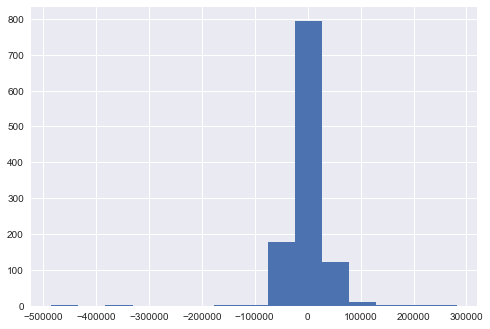

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     167.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.45e-316
Time:                        22:04:59   Log-Likelihood:                -13378.
No. Observations:                1121   AIC:                         2.680e+04
Df Residuals:                    1100   BIC:                         2.690e+04
Df Model:                          20                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.962e+05   1.89e+05     -5.269      0.000   -1.37e+06   -6.26e+05
MSSubClass    -236.4726     74.621     -3.169      0.002    -382.728     -90.217
LotFrontage   -160.1249    195.222     -0.820      0.412    -542.754     222.504
LotArea          0.6452      0.178      3.622      0.000       0.296       0.994
OverallQual    1.98e+04   2861.382      6.918      0.000    1.42e+04    2.54e+04
OverallCond   5859.4323   1164.263      5.033      0.000    3577.519    8141.346
YearBuilt      336.2400     63.861      5.265      0.000     211.075     461.405
YearRemodAdd   152.3933     80.815      1.886      0.059      -6.001     310.788
MasVnrArea      32.2389     12.917      2.496      0.013       6.922      57.555
BsmtFinSF1      18.7318      6.042      3.100      0.002       6.890      30.574
TotalBsmtSF      6.3129     15.819      0.399      0.690     -24.692      37.318
1stFlrSF        -0.1686     36.022     -0.005      0.996     -70.771      70.433
2ndFlrSF         3.4629     37.158      0.093      0.926     -69.365      76.290
GrLivArea       43.9490     33.934      1.295      0.195     -22.561     110.459
FullBath      2787.4275   3862.790      0.722      0.471   -4783.501    1.04e+04
BedroomAbvGr -9440.0054   3330.341     -2.835      0.005    -1.6e+04   -2912.657
TotRmsAbvGrd  4188.7047   2781.507      1.506      0.132   -1262.948    9640.358
Fireplaces    6262.8708   3094.362      2.024      0.043     198.032    1.23e+04
GarageYrBlt    -25.9463     93.204     -0.278      0.781    -208.623     156.731
GarageCars      1.7e+04   9518.963      1.786      0.074   -1659.693    3.57e+04
GarageArea       4.6762     20.722      0.226      0.821     -35.939      45.291
==============================================================================
Omnibus:                      565.412   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80234.700
Skew:                          -1.270   Prob(JB):                         0.00
Kurtosis:                      44.368   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#Model using the above features
data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotFrontage',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             '1stFlrSF',
             '2ndFlrSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageYrBlt',
             'GarageCars',
             'GarageArea']

y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)


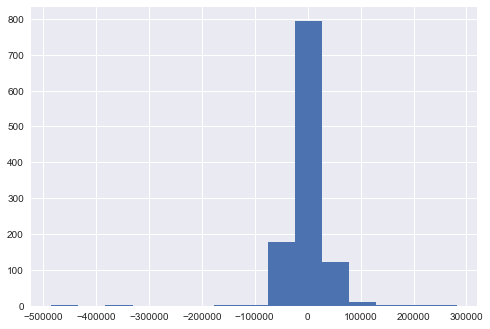

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          2.52e-317
Time:                        22:05:00   Log-Likelihood:                -13378.
No. Observations:                1121   AIC:                         2.680e+04
Df Residuals:                    1101   BIC:                         2.690e+04
Df Model:                          19                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.962e+05   1.89e+05     -5.263      0.000   -1.37e+06   -6.25e+05
MSSubClass    -236.4694     74.537     -3.173      0.002    -382.560     -90.379
LotFrontage   -160.1348    195.514     -0.819      0.413    -543.336     223.066
LotArea          0.6452      0.178      3.623      0.000       0.296       0.994
OverallQual    1.98e+04   2880.566      6.872      0.000    1.42e+04    2.54e+04
OverallCond   5859.3120   1157.885      5.060      0.000    3589.898    8128.726
YearBuilt      336.1701     67.109      5.009      0.000     204.639     467.701
YearRemodAdd   152.3856     80.502      1.893      0.058      -5.396     310.167
MasVnrArea      32.2363     12.898      2.499      0.012       6.957      57.516
BsmtFinSF1      18.7314      6.059      3.091      0.002       6.856      30.607
TotalBsmtSF      6.3081     15.988      0.395      0.693     -25.028      37.644
2ndFlrSF         3.6246      8.462      0.428      0.668     -12.961      20.210
GrLivArea       43.7898     15.915      2.752      0.006      12.597      74.982
FullBath      2786.1262   3833.594      0.727      0.467   -4727.581    1.03e+04
BedroomAbvGr -9439.6768   3341.778     -2.825      0.005    -1.6e+04   -2889.913
TotRmsAbvGrd  4188.4327   2765.814      1.514      0.130   -1232.463    9609.329
Fireplaces    6262.5300   3071.463      2.039      0.041     242.572    1.23e+04
GarageYrBlt    -25.8770     92.526     -0.280      0.780    -207.225     155.471
GarageCars      1.7e+04   9496.763      1.790      0.074   -1616.878    3.56e+04
GarageArea       4.6765     20.716      0.226      0.821     -35.927      45.280
==============================================================================
Omnibus:                      565.435   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80237.719
Skew:                          -1.270   Prob(JB):                         0.00
Kurtosis:                      44.369   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotFrontage',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             '2ndFlrSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageYrBlt',
             'GarageCars',
             'GarageArea']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

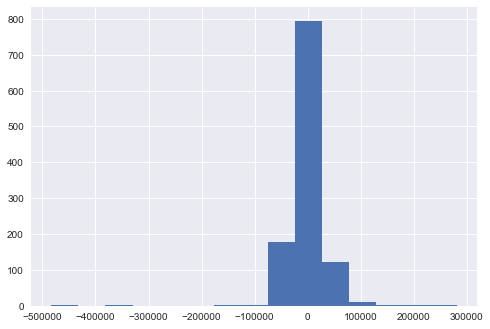

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     184.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.70e-317
Time:                        22:05:01   Log-Likelihood:                -13378.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1102   BIC:                         2.689e+04
Df Model:                          18                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.003e+06   2.07e+05     -4.845      0.000   -1.41e+06   -5.97e+05
MSSubClass    -237.0622     72.296     -3.279      0.001    -378.761     -95.364
LotFrontage   -156.7708    203.827     -0.769      0.442    -556.265     242.723
LotArea          0.6456      0.178      3.620      0.000       0.296       0.995
OverallQual   1.979e+04   2871.455      6.893      0.000    1.42e+04    2.54e+04
OverallCond   5880.3309   1157.273      5.081      0.000    3612.117    8148.545
YearBuilt      331.5444     69.666      4.759      0.000     195.001     468.088
YearRemodAdd   149.6434     75.293      1.987      0.047       2.072     297.215
MasVnrArea      32.4046     12.724      2.547      0.011       7.466      57.343
BsmtFinSF1      18.8328      6.224      3.026      0.002       6.635      31.031
TotalBsmtSF      6.4369     16.267      0.396      0.692     -25.446      38.319
2ndFlrSF         3.5275      8.164      0.432      0.666     -12.473      19.528
GrLivArea       44.0813     15.817      2.787      0.005      13.080      75.083
FullBath      2742.0100   3919.509      0.700      0.484   -4940.087    1.04e+04
BedroomAbvGr -9493.4870   3405.568     -2.788      0.005   -1.62e+04   -2818.697
TotRmsAbvGrd  4172.6793   2757.040      1.513      0.130   -1231.019    9576.377
Fireplaces    6177.3449   3084.516      2.003      0.045     131.804    1.22e+04
GarageYrBlt    -15.1387    109.894     -0.138      0.890    -230.528     200.250
GarageCars    1.791e+04   6387.764      2.804      0.005    5389.615    3.04e+04
==============================================================================
Omnibus:                      563.771   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79308.489
Skew:                          -1.265   Prob(JB):                         0.00
Kurtosis:                      44.128   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Update previous model based on pvalues.
#Remove variables : 1st Floor, Garage Area

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotFrontage',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             '2ndFlrSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageYrBlt',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)


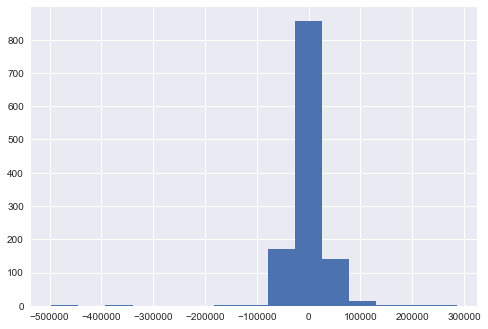

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:02   Log-Likelihood:                -14253.
No. Observations:                1195   AIC:                         2.854e+04
Df Residuals:                    1177   BIC:                         2.863e+04
Df Model:                          17                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.104e+06   1.33e+05     -8.330      0.000   -1.36e+06   -8.45e+05
MSSubClass    -211.2010     61.925     -3.411      0.001    -332.571     -89.831
LotFrontage   -134.9396    186.640     -0.723      0.470    -500.747     230.867
LotArea          0.6499      0.184      3.525      0.000       0.289       1.011
OverallQual   1.827e+04   2530.868      7.220      0.000    1.33e+04    2.32e+04
OverallCond   4673.9988   1099.307      4.252      0.000    2519.397    6828.600
YearBuilt      317.6250     57.469      5.527      0.000     204.989     430.261
YearRemodAdd   209.1226     65.449      3.195      0.001      80.844     337.401
MasVnrArea      35.6901     12.889      2.769      0.006      10.429      60.951
BsmtFinSF1      18.5574      6.384      2.907      0.004       6.045      31.070
TotalBsmtSF      8.0954     14.527      0.557      0.577     -20.378      36.568
2ndFlrSF         2.1999      7.900      0.278      0.781     -13.284      17.683
GrLivArea       44.2232     14.904      2.967      0.003      15.012      73.435
FullBath      5125.8688   3986.339      1.286      0.198   -2687.211    1.29e+04
BedroomAbvGr -9550.8003   3352.895     -2.849      0.004   -1.61e+04   -2979.247
TotRmsAbvGrd  4375.5462   2719.556      1.609      0.108    -954.685    9705.777
Fireplaces    6216.7504   2937.088      2.117      0.034     460.163     1.2e+04
GarageCars    1.173e+04   4025.155      2.913      0.004    3838.104    1.96e+04
==============================================================================
Omnibus:                      607.590   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92030.447
Skew:                          -1.281   Prob(JB):                         0.00
Kurtosis:                      45.916   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor, Garage Area, GarageYrBlt

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotFrontage',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             '2ndFlrSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

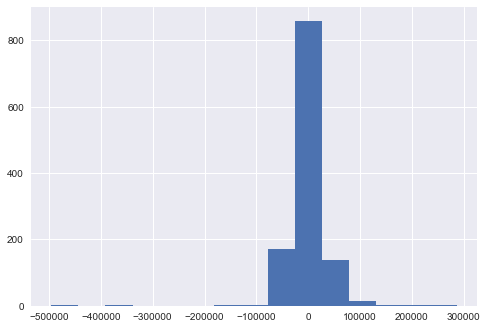

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     221.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:03   Log-Likelihood:                -14253.
No. Observations:                1195   AIC:                         2.854e+04
Df Residuals:                    1178   BIC:                         2.863e+04
Df Model:                          16                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.107e+06   1.37e+05     -8.103      0.000   -1.37e+06   -8.39e+05
MSSubClass    -209.5562     65.792     -3.185      0.001    -338.506     -80.607
LotFrontage   -137.2960    179.147     -0.766      0.443    -488.417     213.825
LotArea          0.6502      0.185      3.523      0.000       0.288       1.012
OverallQual   1.832e+04   2397.348      7.642      0.000    1.36e+04     2.3e+04
OverallCond   4702.4933   1121.721      4.192      0.000    2503.961    6901.026
YearBuilt      319.6861     60.106      5.319      0.000     201.880     437.492
YearRemodAdd   208.0236     65.195      3.191      0.001      80.243     335.804
MasVnrArea      35.7395     12.848      2.782      0.005      10.557      60.922
BsmtFinSF1      18.4963      6.213      2.977      0.003       6.318      30.674
TotalBsmtSF      6.8473     10.928      0.627      0.531     -14.572      28.266
GrLivArea       46.0659     17.301      2.663      0.008      12.156      79.976
FullBath      5039.1821   4148.583      1.215      0.224   -3091.891    1.32e+04
BedroomAbvGr -9455.6033   3192.315     -2.962      0.003   -1.57e+04   -3198.780
TotRmsAbvGrd  4336.4405   2768.196      1.567      0.117   -1089.123    9762.004
Fireplaces    6138.3327   3025.768      2.029      0.042     207.936    1.21e+04
GarageCars     1.17e+04   4070.808      2.875      0.004    3723.341    1.97e+04
==============================================================================
Omnibus:                      604.488   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91140.605
Skew:                          -1.269   Prob(JB):                         0.00
Kurtosis:                      45.708   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotFrontage',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

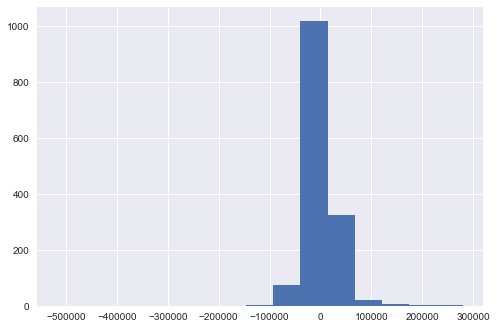

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:04   Log-Likelihood:                -17246.
No. Observations:                1452   AIC:                         3.452e+04
Df Residuals:                    1436   BIC:                         3.461e+04
Df Model:                          15                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.123e+06   1.11e+05    -10.136      0.000   -1.34e+06   -9.06e+05
MSSubClass    -180.8108     30.045     -6.018      0.000    -239.697    -121.924
LotArea          0.4638      0.119      3.902      0.000       0.231       0.697
OverallQual    1.78e+04   1937.929      9.184      0.000     1.4e+04    2.16e+04
OverallCond   4606.5207    919.629      5.009      0.000    2804.081    6408.960
YearBuilt      329.5539     52.977      6.221      0.000     225.722     433.386
YearRemodAdd   205.3257     53.839      3.814      0.000      99.804     310.848
MasVnrArea      31.1039     10.734      2.898      0.004      10.065      52.143
BsmtFinSF1      16.7045      6.049      2.761      0.006       4.848      28.561
TotalBsmtSF      9.3128      9.718      0.958      0.338      -9.734      28.359
GrLivArea       47.3142     15.668      3.020      0.003      16.605      78.023
FullBath      2672.3343   3874.446      0.690      0.490   -4921.440    1.03e+04
BedroomAbvGr -9931.2123   2474.147     -4.014      0.000   -1.48e+04   -5081.973
TotRmsAbvGrd  4208.3281   2286.686      1.840      0.066    -273.493    8690.149
Fireplaces    5451.7297   2625.259      2.077      0.038     306.317    1.06e+04
GarageCars    1.085e+04   3408.529      3.185      0.001    4174.194    1.75e+04
==============================================================================
Omnibus:                      783.919   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143682.741
Skew:                          -1.409   Prob(JB):                         0.00
Kurtosis:                      51.652   Cond. No.                     1.94e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             'GrLivArea',
             'FullBath',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

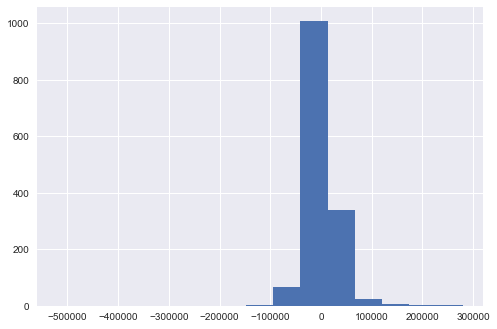

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     277.4
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:04   Log-Likelihood:                -17247.
No. Observations:                1452   AIC:                         3.452e+04
Df Residuals:                    1437   BIC:                         3.460e+04
Df Model:                          14                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.165e+06   9.06e+04    -12.868      0.000   -1.34e+06   -9.88e+05
MSSubClass    -177.8672     27.409     -6.489      0.000    -231.588    -124.147
LotArea          0.4666      0.117      3.974      0.000       0.236       0.697
OverallQual   1.787e+04   2006.930      8.902      0.000    1.39e+04    2.18e+04
OverallCond   4539.1582    940.792      4.825      0.000    2695.239    6383.077
YearBuilt      343.1345     46.289      7.413      0.000     252.410     433.859
YearRemodAdd   213.9103     54.045      3.958      0.000     107.985     319.836
MasVnrArea      30.8028     10.644      2.894      0.004       9.941      51.664
BsmtFinSF1      16.3437      6.431      2.541      0.011       3.738      28.949
TotalBsmtSF      9.3348      9.709      0.961      0.336      -9.695      28.364
GrLivArea       48.4337     14.637      3.309      0.001      19.745      77.122
BedroomAbvGr -9715.5144   2608.558     -3.724      0.000   -1.48e+04   -4602.834
TotRmsAbvGrd  4265.3249   2315.011      1.842      0.065    -272.014    8802.664
Fireplaces    5364.8213   2570.539      2.087      0.037     326.657    1.04e+04
GarageCars    1.095e+04   3514.556      3.116      0.002    4062.443    1.78e+04
==============================================================================
Omnibus:                      794.067   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147943.290
Skew:                          -1.440   Prob(JB):                         0.00
Kurtosis:                      52.367   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'TotalBsmtSF',
             'GrLivArea',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

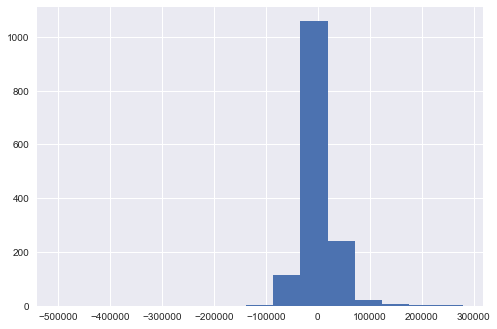

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     287.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:05   Log-Likelihood:                -17251.
No. Observations:                1452   AIC:                         3.453e+04
Df Residuals:                    1438   BIC:                         3.460e+04
Df Model:                          13                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.176e+06    9.3e+04    -12.653      0.000   -1.36e+06   -9.94e+05
MSSubClass    -200.9915     19.515    -10.299      0.000    -239.240    -162.743
LotArea          0.4941      0.129      3.834      0.000       0.242       0.747
OverallQual   1.865e+04   1369.136     13.624      0.000     1.6e+04    2.13e+04
OverallCond   4165.6342    861.490      4.835      0.000    2477.145    5854.124
YearBuilt      348.6065     48.557      7.179      0.000     253.437     443.776
YearRemodAdd   216.4814     54.317      3.986      0.000     110.022     322.940
MasVnrArea      31.9456     10.588      3.017      0.003      11.194      52.697
BsmtFinSF1      19.3947      8.667      2.238      0.025       2.409      36.381
GrLivArea       50.3168     15.529      3.240      0.001      19.881      80.752
BedroomAbvGr -9976.9749   2729.305     -3.656      0.000   -1.53e+04   -4627.635
TotRmsAbvGrd  4154.1184   2342.273      1.774      0.076    -436.652    8744.889
Fireplaces    5337.3721   2548.448      2.094      0.036     342.506    1.03e+04
GarageCars    1.108e+04   3256.785      3.402      0.001    4695.283    1.75e+04
==============================================================================
Omnibus:                      699.769   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118116.150
Skew:                          -1.144   Prob(JB):                         0.00
Kurtosis:                      47.126   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Update previous model based on pvalues.
#Remove variable : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'GrLivArea',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

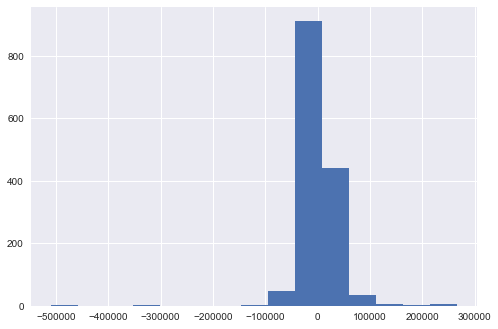

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     292.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:05   Log-Likelihood:                -17257.
No. Observations:                1452   AIC:                         3.454e+04
Df Residuals:                    1439   BIC:                         3.461e+04
Df Model:                          12                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.168e+06   9.14e+04    -12.774      0.000   -1.35e+06   -9.88e+05
MSSubClass    -201.7610     19.550    -10.320      0.000    -240.079    -163.443
LotArea          0.4839      0.135      3.571      0.000       0.218       0.749
OverallQual   1.871e+04   1392.667     13.433      0.000     1.6e+04    2.14e+04
OverallCond   3973.9539    890.988      4.460      0.000    2227.650    5720.258
YearBuilt      333.6816     51.702      6.454      0.000     232.348     435.015
YearRemodAdd   230.5678     57.311      4.023      0.000     118.240     342.895
MasVnrArea      31.8948     10.400      3.067      0.002      11.512      52.278
BsmtFinSF1      18.6052      8.960      2.076      0.038       1.044      36.167
GrLivArea       58.4498     12.326      4.742      0.000      34.292      82.608
BedroomAbvGr -7214.5575   3179.918     -2.269      0.023   -1.34e+04    -982.033
Fireplaces    5318.1765   2563.851      2.074      0.038     293.120    1.03e+04
GarageCars    1.161e+04   3431.130      3.383      0.001    4881.740    1.83e+04
==============================================================================
Omnibus:                      726.150   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124333.885
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                      48.267   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Update previous model based on pvalues and SE
#Remove variables : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF, TotRmsAbvGrd

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'GrLivArea',
             'BedroomAbvGr',
             'Fireplaces',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

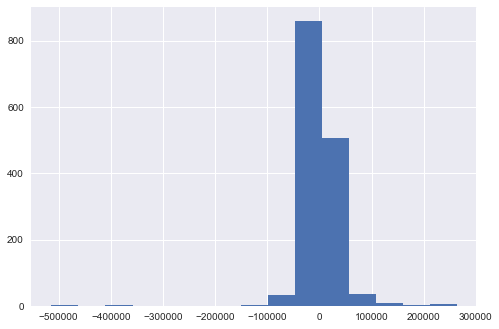

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:06   Log-Likelihood:                -17262.
No. Observations:                1452   AIC:                         3.455e+04
Df Residuals:                    1440   BIC:                         3.461e+04
Df Model:                          11                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.123e+06   9.25e+04    -12.143      0.000    -1.3e+06   -9.42e+05
MSSubClass    -205.7171     19.326    -10.645      0.000    -243.595    -167.839
LotArea          0.5296      0.121      4.374      0.000       0.292       0.767
OverallQual   1.925e+04   1530.471     12.576      0.000    1.62e+04    2.22e+04
OverallCond   4140.3843    886.697      4.669      0.000    2402.490    5878.278
YearBuilt      334.9857     52.077      6.433      0.000     232.918     437.054
YearRemodAdd   204.7699     53.669      3.815      0.000      99.580     309.960
MasVnrArea      32.0493     10.255      3.125      0.002      11.949      52.149
BsmtFinSF1      19.3049      8.842      2.183      0.029       1.974      36.636
GrLivArea       60.9266     11.516      5.291      0.000      38.356      83.497
BedroomAbvGr -7780.9967   3016.158     -2.580      0.010   -1.37e+04   -1869.435
GarageCars    1.174e+04   3502.997      3.350      0.001    4869.703    1.86e+04
==============================================================================
Omnibus:                      766.508   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130889.344
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                      49.432   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#Update previous model based on pvalues and SE
#Remove variables : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF, TotRmsAbvGrd
#Fireplaces

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'BsmtFinSF1',
             'GrLivArea',
             'BedroomAbvGr',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

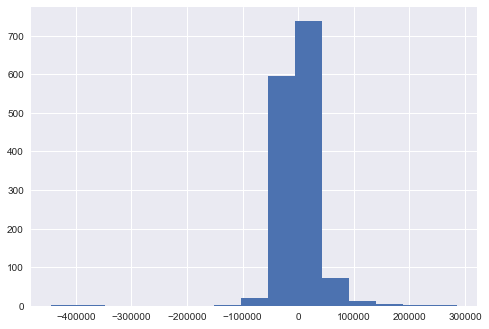

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:06   Log-Likelihood:                -17298.
No. Observations:                1452   AIC:                         3.462e+04
Df Residuals:                    1441   BIC:                         3.468e+04
Df Model:                          10                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.165e+06   9.99e+04    -11.669      0.000   -1.36e+06    -9.7e+05
MSSubClass    -221.0526     22.512     -9.819      0.000    -265.176    -176.929
LotArea          0.6629      0.148      4.481      0.000       0.373       0.953
OverallQual   1.899e+04   1513.007     12.551      0.000     1.6e+04     2.2e+04
OverallCond   4976.4575    951.286      5.231      0.000    3111.971    6840.944
YearBuilt      416.0509     67.204      6.191      0.000     284.334     547.768
YearRemodAdd   148.5575     62.498      2.377      0.017      26.063     271.052
MasVnrArea      38.8599     10.776      3.606      0.000      17.739      59.981
GrLivArea       65.5359     11.894      5.510      0.000      42.224      88.848
BedroomAbvGr -1.065e+04   3688.143     -2.886      0.004   -1.79e+04   -3416.450
GarageCars    1.161e+04   3133.869      3.704      0.000    5464.226    1.77e+04
==============================================================================
Omnibus:                      457.936   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53757.292
Skew:                          -0.344   Prob(JB):                         0.00
Kurtosis:                      32.801   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#Remove variables : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF, TotRmsAbvGrd
#Fireplaces, BsmtFinSF1

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'GrLivArea',
             'BedroomAbvGr',
             'GarageCars']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

In [43]:
df3.corr().loc['GrLivArea']

Id               0.008273
MSSubClass       0.074853
LotFrontage      0.402797
LotArea          0.263116
OverallQual      0.593007
OverallCond     -0.079686
YearBuilt        0.199010
YearRemodAdd     0.287389
MasVnrArea       0.390857
BsmtFinSF1       0.208171
BsmtFinSF2      -0.009640
BsmtUnfSF        0.240257
TotalBsmtSF      0.454868
1stFlrSF         0.566024
2ndFlrSF         0.687501
LowQualFinSF     0.134683
GrLivArea        1.000000
BsmtFullBath     0.034836
BsmtHalfBath    -0.018918
FullBath         0.630012
HalfBath         0.415772
BedroomAbvGr     0.521270
KitchenAbvGr     0.100063
TotRmsAbvGrd     0.825489
Fireplaces       0.461679
GarageYrBlt      0.231197
GarageCars       0.467247
GarageArea       0.468997
WoodDeckSF       0.247433
OpenPorchSF      0.330224
EnclosedPorch    0.009113
3SsnPorch        0.020643
ScreenPorch      0.101510
PoolArea         0.170205
MiscVal         -0.002416
MoSold           0.050240
YrSold          -0.036526
SalePrice        0.708624
Name: GrLivA

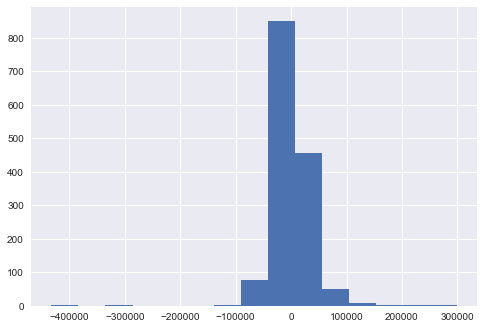

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     261.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.71e-274
Time:                        22:05:07   Log-Likelihood:                -17349.
No. Observations:                1452   AIC:                         3.472e+04
Df Residuals:                    1443   BIC:                         3.476e+04
Df Model:                           8                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.461e+06    9.4e+04    -15.545      0.000   -1.65e+06   -1.28e+06
MSSubClass    -221.5413     21.052    -10.524      0.000    -262.802    -180.281
LotArea          0.7528      0.160      4.715      0.000       0.440       1.066
OverallQual   2.218e+04   1496.059     14.823      0.000    1.92e+04    2.51e+04
OverallCond   4188.9313    979.188      4.278      0.000    2269.758    6108.105
YearBuilt      484.5735     52.101      9.301      0.000     382.458     586.689
YearRemodAdd   222.9347     56.590      3.939      0.000     112.021     333.849
MasVnrArea      45.2503     11.185      4.046      0.000      23.329      67.172
GrLivArea       56.6172      7.114      7.959      0.000      42.675      70.560
==============================================================================
Omnibus:                      402.965   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36568.515
Skew:                           0.069   Prob(JB):                         0.00
Kurtosis:                      27.585   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Remove variables : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF, TotRmsAbvGrd
#Fireplaces, BsmtFinSF1, 'BedroomAbvGr' (corr. with 'GrLivArea'),'GarageCars' (corr. with 'GrLivArea')



data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'LotArea',
             'OverallQual',
             'OverallCond',
             'YearBuilt',
             'YearRemodAdd',
             'MasVnrArea',
             'GrLivArea']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

In [45]:
df3.corr().loc['OverallQual'].sort_values(ascending = False)

OverallQual      1.000000
SalePrice        0.790982
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
FullBath         0.550600
GarageYrBlt      0.547766
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
MasVnrArea       0.411876
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
HalfBath         0.273458
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
MSSubClass       0.032628
3SsnPorch        0.030371
YrSold          -0.027347
Id              -0.028365
LowQualFinSF    -0.030429
MiscVal         -0.031406
BsmtHalfBath    -0.040150
BsmtFinSF2      -0.059119
OverallCond     -0.091932
EnclosedPorch   -0.113937
KitchenAbvGr    -0.183882
Name: Overal

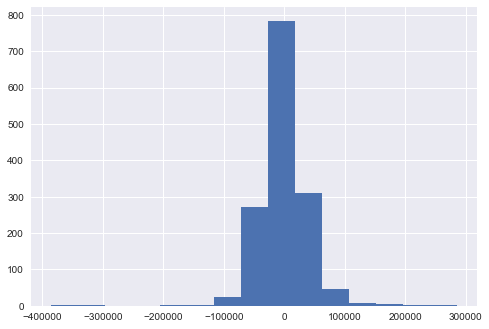

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     489.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          8.09e-220
Time:                        22:05:08   Log-Likelihood:                -17585.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1456   BIC:                         3.520e+04
Df Model:                           3                                         
Covariance Type:                  HC2                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.18e+04   8085.186    -11.354      0.000   -1.08e+05    -7.6e+04
MSSubClass   -246.7106     23.440    -10.525      0.000    -292.653    -200.769
OverallQual  3.271e+04   1222.507     26.758      0.000    3.03e+04    3.51e+04
GrLivArea      57.5624      7.004      8.218      0.000      43.834      71.290
==============================================================================
Omnibus:                      348.599   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10953.510
Skew:                           0.408   Prob(JB):                         0.00
Kurtosis:                      16.394   Cond. No.                     7.60e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#Remove variables : 1st Floor, Garage Area, GarageYrBlt, 2ndFlrSF, LotFrontage, FullBath, TotalBsmtSF, TotRmsAbvGrd
#Fireplaces, BsmtFinSF1, 'BedroomAbvGr' (corr. with 'GrLivArea'),'GarageCars' (corr. with 'GrLivArea')
#'YearRemodAdd' (corr. with 'OverallQual'),'YearBuilt'(corr. with 'OverallQual'),'MasVnrArea' (corr. with 'OverallQual')
#'OverallCond', 'LotArea'

data = df3
target_var = 'SalePrice'
features = [ 'MSSubClass',
             'OverallQual',
             'GrLivArea']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

In [47]:
#dummy variable overall_qual
dummy_overall_qual = pd.get_dummies(df3['OverallQual'], drop_first = True)
map_names = {k : 'overall_qual_'+str(k) for k in dummy_overall_qual.columns}
dummy_overall_qual = dummy_overall_qual.rename(columns = map_names)

#dummy variable 'MSSubClass'
dummy_mssubclass = pd.get_dummies(df3['MSSubClass'], drop_first = True)
map_names = {k : 'mssubclass_'+str(k) for k in dummy_mssubclass.columns}
dummy_mssubclass = dummy_mssubclass.rename(columns = map_names)
dummy_mssubclass.columns 

Index(['mssubclass_30', 'mssubclass_40', 'mssubclass_45', 'mssubclass_50',
       'mssubclass_60', 'mssubclass_70', 'mssubclass_75', 'mssubclass_80',
       'mssubclass_85', 'mssubclass_90', 'mssubclass_120', 'mssubclass_160',
       'mssubclass_180', 'mssubclass_190'],
      dtype='object')

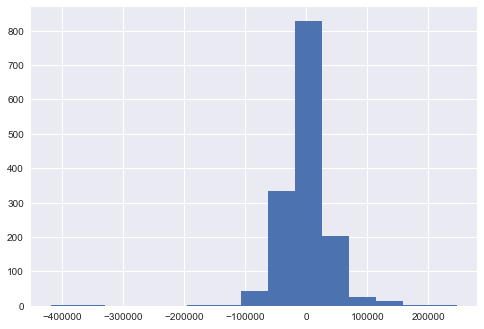

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     368.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:09   Log-Likelihood:                -17503.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1449   BIC:                         3.509e+04
Df Model:                          10                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.759e+04   5643.011      3.117      0.002    6529.022    2.86e+04
overall_qual_2   4057.5774   9000.793      0.451      0.652   -1.36e+04    2.17e+04
overall_qual_3   1.101e+04   6704.537      1.643      0.100   -2125.987    2.42e+04
overall_qual_4   3.262e+04   5632.396      5.791      0.000    2.16e+04    4.37e+04
overall_qual_5   5.014e+04   5784.774      8.668      0.000    3.88e+04    6.15e+04
overall_qual_6   6.691e+04   6760.098      9.897      0.000    5.37e+04    8.02e+04
overall_qual_7   1.005e+05   8031.905     12.513      0.000    8.48e+04    1.16e+05
overall_qual_8   1.547e+05   9871.175     15.672      0.000    1.35e+05    1.74e+05
overall_qual_9   2.406e+05   1.39e+04     17.254      0.000    2.13e+05    2.68e+05
overall_qual_10  2.631e+05   3.03e+04      8.688      0.000    2.04e+05    3.22e+05
GrLivArea          52.6024      6.190      8.499      0.000      40.471      64.734
==============================================================================
Omnibus:                      401.609   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17708.041
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                      20.033   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#OverallQual and 'MSSubClass' as dummy variables
data = df3.copy()
data = pd.merge(data, dummy_overall_qual, left_index = True, right_index = True)
data = pd.merge(data, dummy_mssubclass, left_index = True, right_index = True)
target_var = 'SalePrice'
features = [ 'overall_qual_2',
             'overall_qual_3',
             'overall_qual_4',
             'overall_qual_5',
             'overall_qual_6',
             'overall_qual_7',
             'overall_qual_8',
             'overall_qual_9',
             'overall_qual_10',
             'GrLivArea']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)

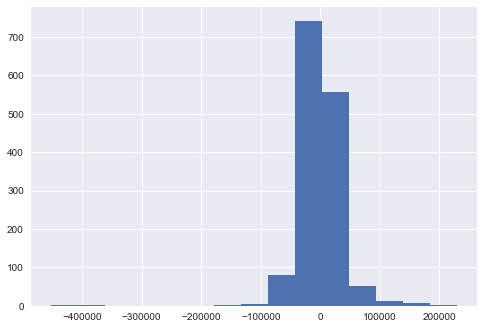

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:05:09   Log-Likelihood:                -17382.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1435   BIC:                         3.495e+04
Df Model:                          24                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.242e+04   8373.241      2.677      0.007    6005.787    3.88e+04
overall_qual_2   8847.5963   1.61e+04      0.550      0.583   -2.27e+04    4.04e+04
overall_qual_3   1.729e+04   7126.444      2.426      0.015    3317.975    3.13e+04
overall_qual_4    3.39e+04   6115.421      5.544      0.000    2.19e+04    4.59e+04
overall_qual_5   4.475e+04   6531.503      6.851      0.000    3.19e+04    5.76e+04
overall_qual_6   6.042e+04   7736.408      7.810      0.000    4.53e+04    7.56e+04
overall_qual_7   8.883e+04   9380.491      9.469      0.000    7.04e+04    1.07e+05
overall_qual_8   1.354e+05    1.2e+04     11.308      0.000    1.12e+05    1.59e+05
overall_qual_9   2.153e+05    1.6e+04     13.458      0.000    1.84e+05    2.47e+05
overall_qual_10  2.353e+05   2.81e+04      8.385      0.000     1.8e+05     2.9e+05
mssubclass_30   -2.524e+04   3308.405     -7.629      0.000   -3.17e+04   -1.88e+04
mssubclass_40   -1.306e+04   2.19e+04     -0.596      0.551    -5.6e+04    2.99e+04
mssubclass_45   -2.609e+04   6323.340     -4.126      0.000   -3.85e+04   -1.37e+04
mssubclass_50   -3.505e+04   3798.066     -9.228      0.000   -4.25e+04   -2.76e+04
mssubclass_60   -1.378e+04   3933.222     -3.504      0.000   -2.15e+04   -6071.495
mssubclass_70   -4.398e+04   6563.855     -6.701      0.000   -5.68e+04   -3.11e+04
mssubclass_75   -7.096e+04   1.48e+04     -4.797      0.000      -1e+05    -4.2e+04
mssubclass_80   -7617.3186   4005.052     -1.902      0.057   -1.55e+04     232.440
mssubclass_85    3527.6417   4222.373      0.835      0.403   -4748.057    1.18e+04
mssubclass_90   -3.665e+04   5359.336     -6.839      0.000   -4.72e+04   -2.61e+04
mssubclass_120  -8505.8927   4459.229     -1.907      0.056   -1.72e+04     234.035
mssubclass_160  -4.146e+04   3400.532    -12.193      0.000   -4.81e+04   -3.48e+04
mssubclass_180  -1.354e+04   4692.972     -2.885      0.004   -2.27e+04   -4342.914
mssubclass_190  -4.186e+04   8156.821     -5.132      0.000   -5.78e+04   -2.59e+04
GrLivArea          65.1910      9.154      7.122      0.000      47.250      83.132
==============================================================================
Omnibus:                      627.622   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50533.711
Skew:                          -1.095   Prob(JB):                         0.00
Kurtosis:                      31.738   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Selected Model
#OverallQual and 'MSSubClass' as dummy variables
data = df3.copy()
data = pd.merge(data, dummy_overall_qual, left_index = True, right_index = True)
data = pd.merge(data, dummy_mssubclass, left_index = True, right_index = True)
target_var = 'SalePrice'
features = [ 'overall_qual_2',
             'overall_qual_3',
             'overall_qual_4',
             'overall_qual_5',
             'overall_qual_6',
             'overall_qual_7',
             'overall_qual_8',
             'overall_qual_9',
             'overall_qual_10',
             'mssubclass_30',
             'mssubclass_40',
             'mssubclass_45',
             'mssubclass_50', 
             'mssubclass_60', 
             'mssubclass_70',
             'mssubclass_75', 
             'mssubclass_80', 
             'mssubclass_85', 
             'mssubclass_90', 
             'mssubclass_120',
             'mssubclass_160', 
             'mssubclass_180',
             'mssubclass_190',
             'GrLivArea']


y, X = create_features_dataframe(target_var = target_var , features = features , data = data , add_constant_term = True)
create_model(y, X, one_feature = False, feature = None, cov_type = True)